In [6]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12) 

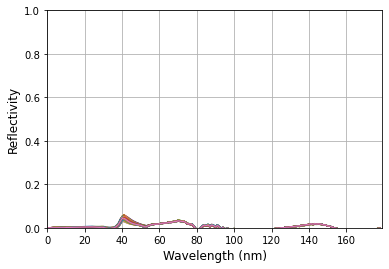

[[ 1.22839861e-04  2.37720191e-04  3.58178570e-04 ... -5.16630531e-03
  -2.71763360e-03 -1.92333544e-03]
 [ 3.39152264e-04  5.45763999e-04  8.27377121e-04 ... -5.42300461e-03
  -2.93948283e-03 -1.90207815e-03]
 [ 1.50262703e-04  2.50232385e-04  3.87825700e-04 ... -4.79680139e-03
  -2.48365891e-03 -1.73440606e-03]
 ...
 [ 2.64314000e-05  7.73691846e-05  1.10484837e-04 ... -5.80925585e-03
  -3.06371920e-03 -2.06172705e-03]
 [ 5.54607751e-06  6.13515885e-05  7.09524208e-05 ... -6.67830195e-03
  -3.56601437e-03 -2.29075786e-03]
 [ 4.29442818e-05  1.01192440e-04  1.44785700e-04 ... -6.99827316e-03
  -3.79773356e-03 -2.43145259e-03]]
[19.5 18.7 17.7 18.6 19.8 17.9 18.9 18.5 18.5 17.5 17.1 17.  16.7 18.7
 18.  17.  17.9 18.8 19.  18.2 18.4 18.8 19.  18.9 16.7 17.2 17.9 19.
 17.2 18.9 19.4 18.6 19.8 19.6 19.3 17.6 18.5 18.7 19.2 18.3 18.  18.6
 17.  18.5 17.2 17.2 18.3 18.3 17.5 17.8 18.1 18.3 15.6 18.9 18.9 18.1
 18.1 16.9 17.2 17.4 17.8 18.8 16.9 17.1 18.8 16.7 19.5 16.8 18.3 18.2
 17.8 16.4

In [7]:
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/4_特征波段提取/SPA/nor_fd/2.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X1 = X2[:,0:-1]
Y = X2[:,-1]

#查看数据
fig1 = plt.figure()
fonts = 12
xx = np.arange(0, 179)
for i in range(X1.shape[0]):
    plt.plot(xx, X1[i, :], linewidth=1)
plt.xlim(0, 179)
plt.ylim(0, 1)
plt.xlabel('Wavelength (nm)', fontsize=fonts)
plt.ylabel('Reflectivity', fontsize=fonts)
plt.grid(True)
plt.show()
print(X1)
print(Y)
print(X1.shape)
print(Y.shape)

2
[  0.   3.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  19.  20.
  21.  22.  23.  24.  25.  26.  27.  30.  34.  35.  36.  37.  38.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  55.
  56.  57.  58.  59.  60.  61.  63.  64.  65.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  95.  97.  98.  99. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 120. 121. 122.
 123. 124. 125. 126. 127. 128. 130. 136. 144. 146. 147. 148. 149. 150.
 151. 152. 153. 154. 155. 156. 157. 158. 162. 164. 165. 166. 171. 172.
 173. 174. 175. 178.]
[ 12   9   1   1   8   6   1   1  10  12   4   3   5   3   4   4   3   4
  52  60   7   1   4   7  14   2   2   1  28  15   3   3   1   6   6  10
   7   8   1 123  18   7   4 144  11  22  17  70   6  97  11  86   1  25
   6  22 108  48  16   7   3   9   9   6   6  65  84   4  87  18  88  79
  15   9  10 192  80  13  60  73  36  18  34 

9
[  0.   1.   3.   6.   7.   8.   9.  10.  11.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  31.  32.
  35.  36.  37.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.
  50.  51.  52.  53.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  83.  84.  85.  86.  87.  89.  90.  91.  92.  93.  94.  95.  97.
  98.  99. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 162. 163. 164. 165. 171. 172. 173. 174.
 175. 176. 178.]
[ 11   2   6   1   1   1   2  11   1   7   8  16   5   1   4   2   4   6
   5   1   5  58  55   4   3   1   3   1   9  12   1   2  21  14   1   1
   1   8   4  12   7  15   1 135  25   2  13   3 147  20  20  26  74   1
   3  93  11   1   2   1  96  20   5  21 100  51  19

16
[  0.   1.   3.   4.   5.   7.  10.  13.  14.  15.  16.  17.  18.  19.
  21.  22.  23.  24.  25.  26.  27.  28.  29.  31.  34.  35.  36.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  79.  80.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  95.  96.  97.  98.  99. 100. 101.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129.
 130. 131. 132. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 162. 164. 165. 166. 168. 170. 172. 173. 174. 175.
 176. 178.]
[ 27   4  32   1   1   1  15   3  14  35  14   7   5   3   6   4   3  14
  56  69   5   2   2   1   2  27  30   6  48  21   3   1   2   7   6  11
  11  15   2 138  29   1   1  14   3 175  23  25  41 104   2   8 125  16
   3   1  77   1  37   4  19 125  59  29  14   6   4   3

23
[  0.   1.   3.   4.   5.   7.   8.   9.  10.  11.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  23.  24.  25.  26.  27.  28.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  43.  44.  45.  46.  47.  48.
  49.  51.  52.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  95.
  97.  98.  99. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 132. 139. 141. 144. 146. 147. 148. 149. 150.
 151. 152. 153. 154. 155. 156. 157. 158. 162. 163. 164. 165. 168. 170.
 172. 173. 174. 175. 178.]
[ 34   7  67   1   6   5   1   1  17   2   6  21  61  29  20  12   4   4
   1   1  19  49  62  13   2   1   2   1   8  52  46   2   1   5  91  32
   4   2   7   9  19  16  21 140  21   3  14   5 213  16  42  78 153   1
  10 178  30   1   1  96   1  32   4  26 

29
[  0.   1.   2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  84.  85.  86.  87.  88.
  89.  90.  91.  92.  93.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117.
 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131.
 132. 135. 136. 144. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 162. 164. 165. 166. 167. 169. 170. 171. 172.
 173. 174. 175. 176. 178.]
[ 34   8   3 115   2   7   1   1   4  20   1   1   3  30  69  55  44  14
   5   2   6   4   2  10  62 104   5   1   3   1   4   1  20  64  76   1
   4   7 112  38   3   2   1   8   9  17  1

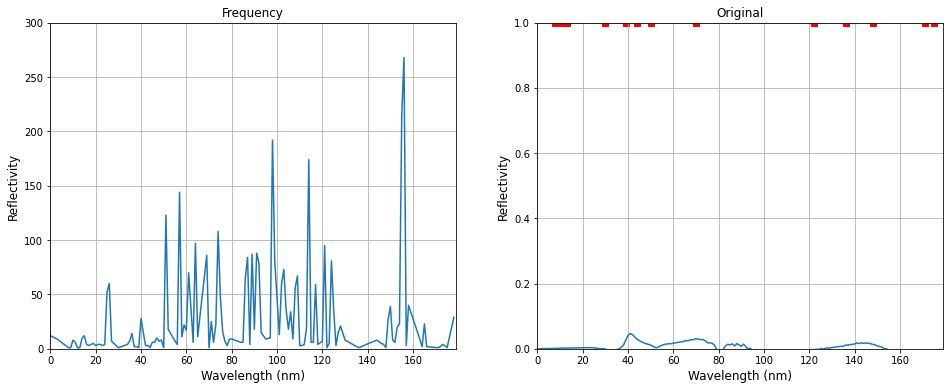

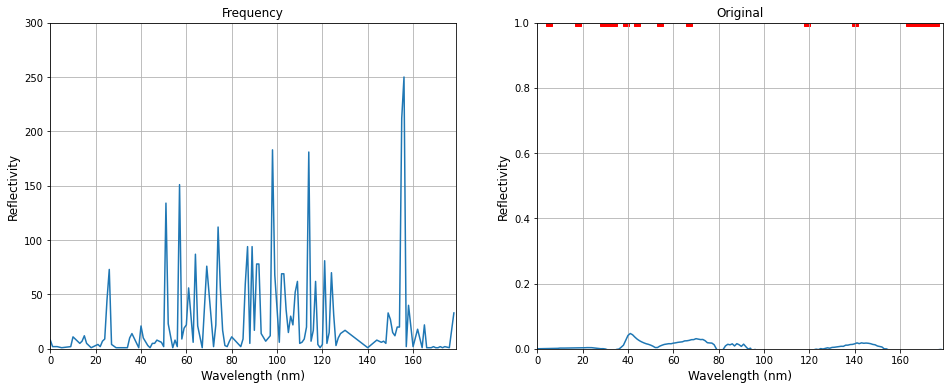

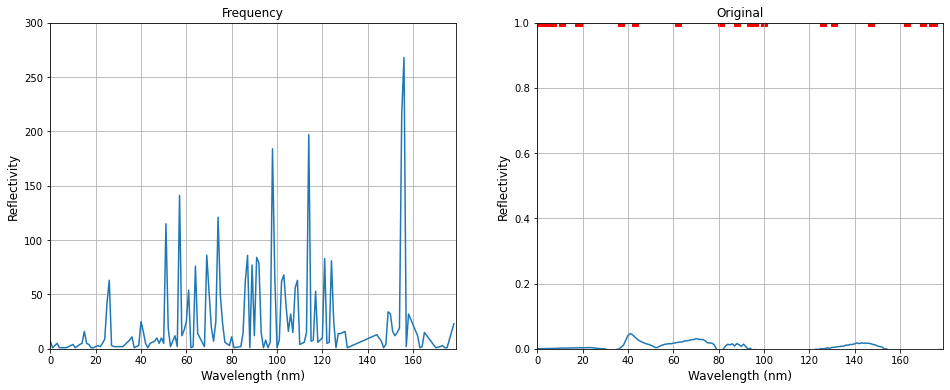

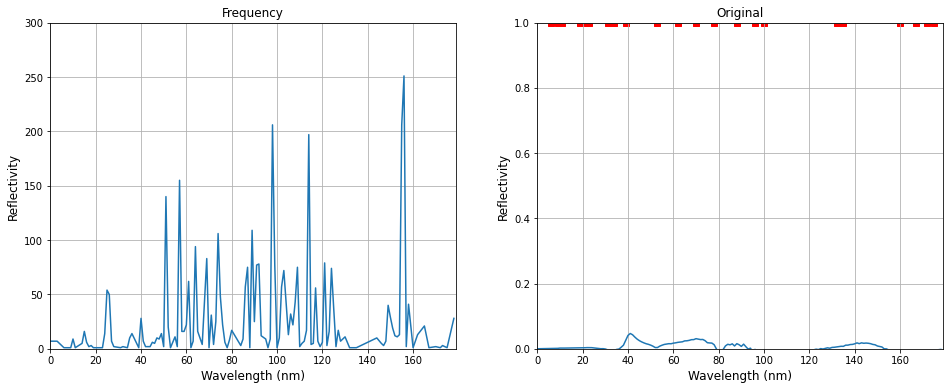

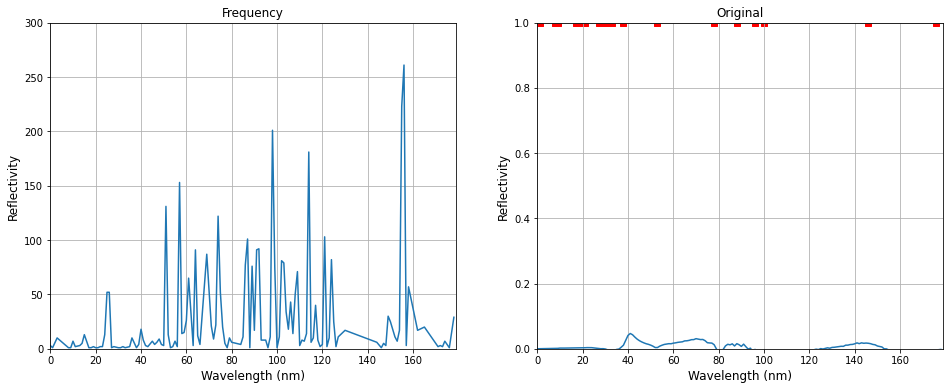

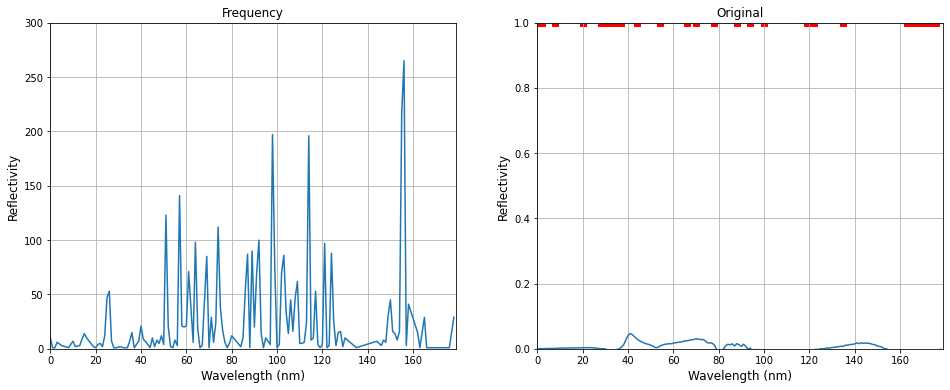

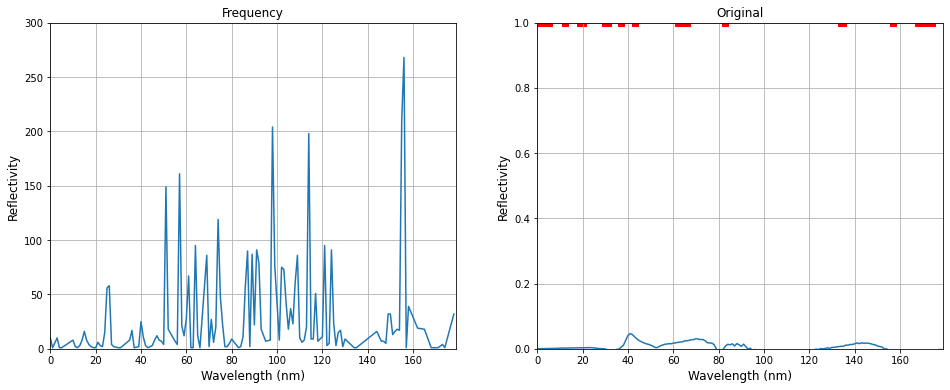

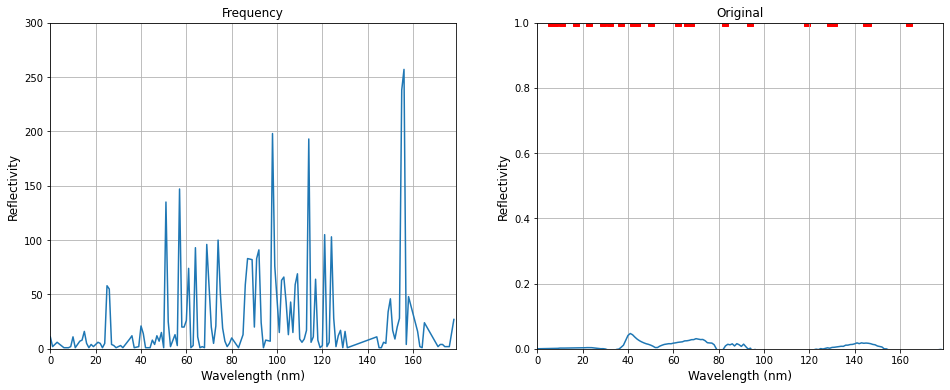

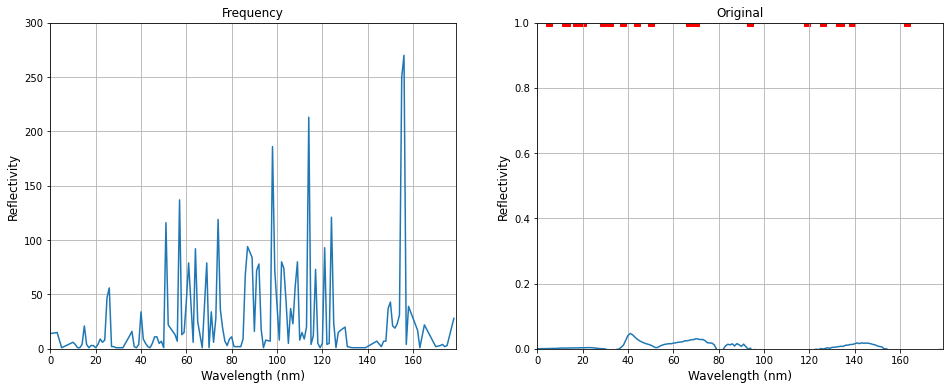

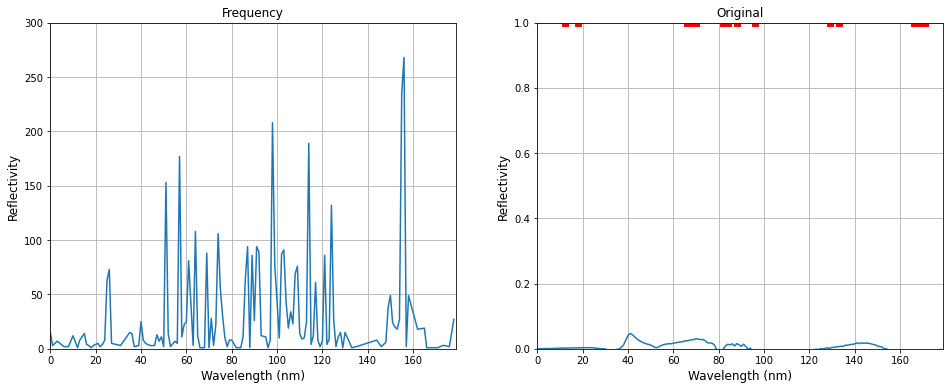

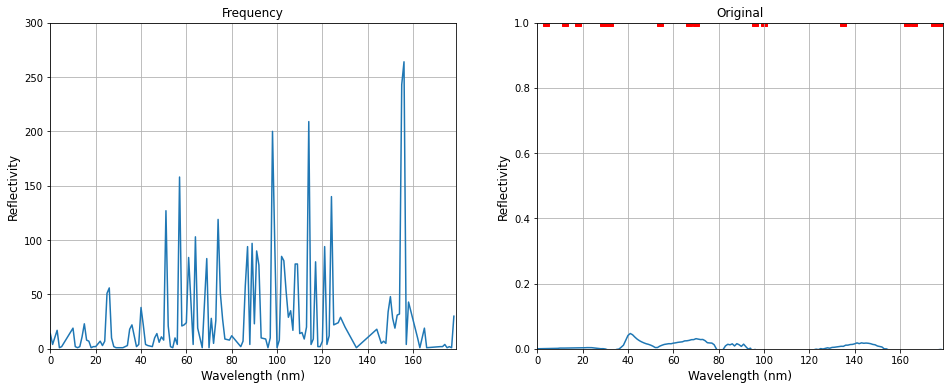

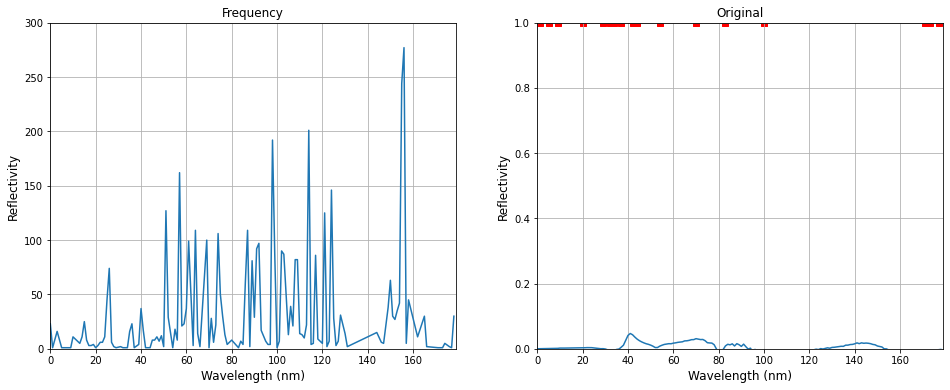

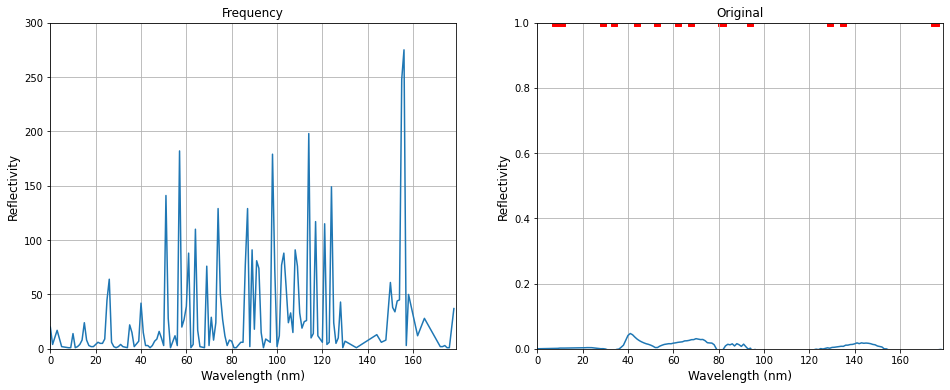

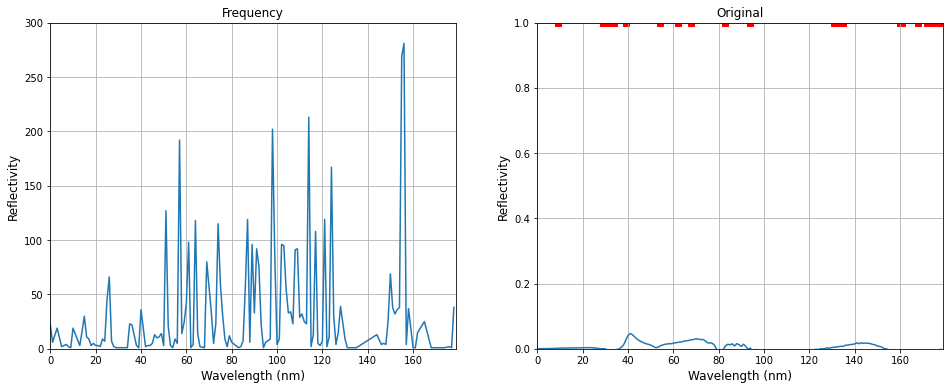

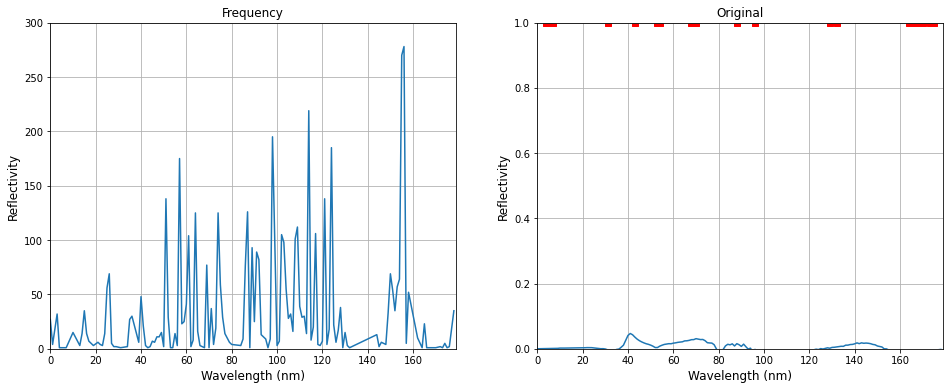

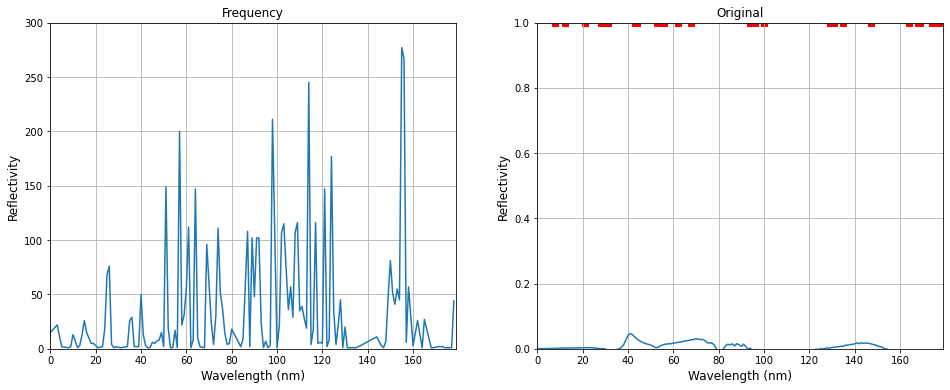

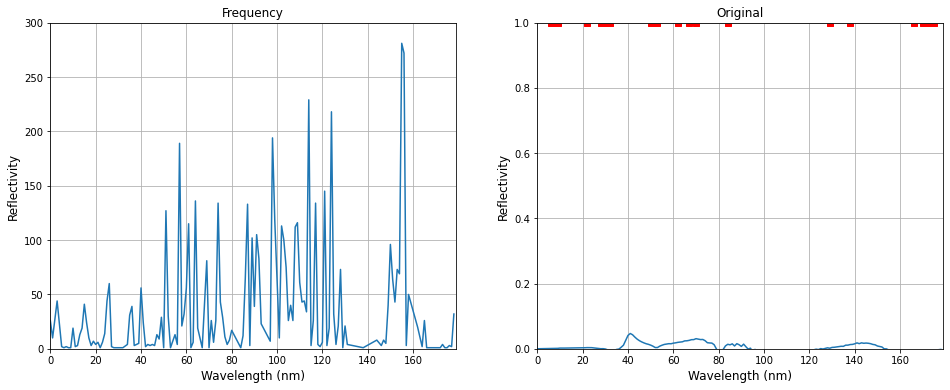

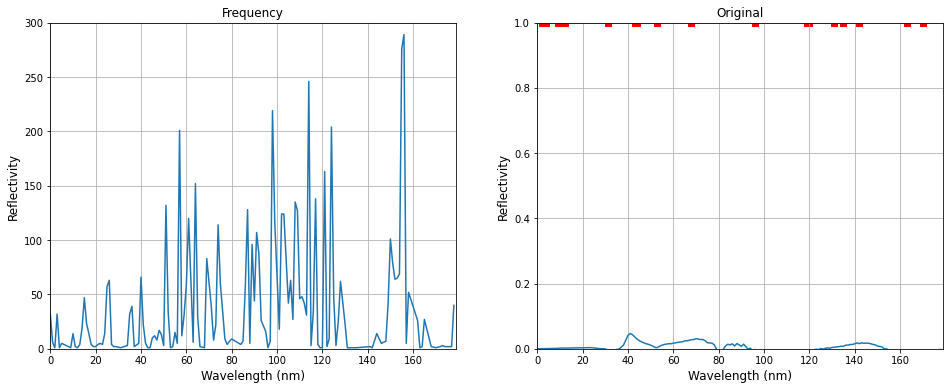

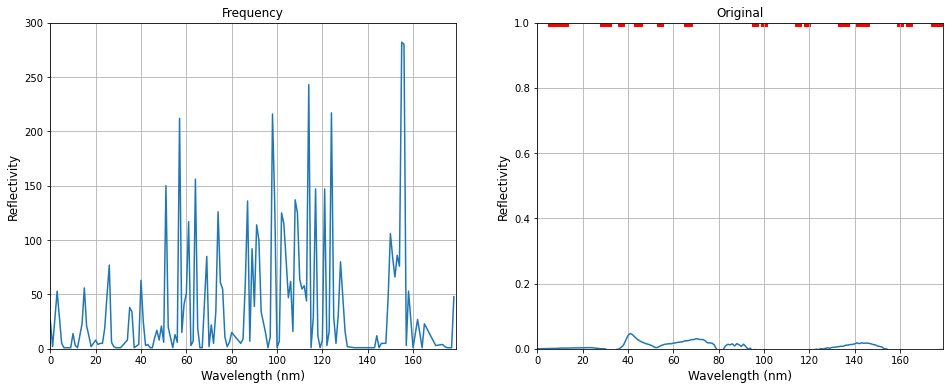

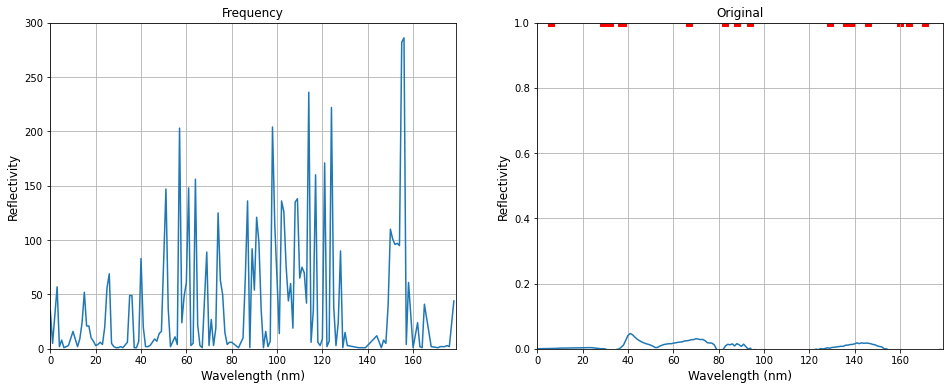

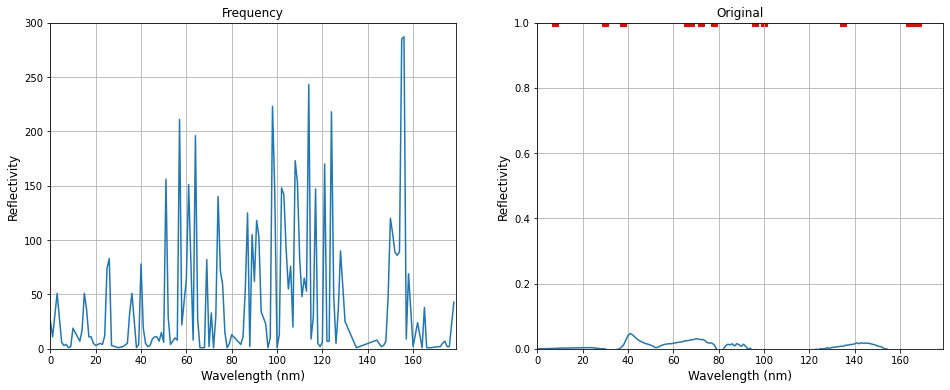

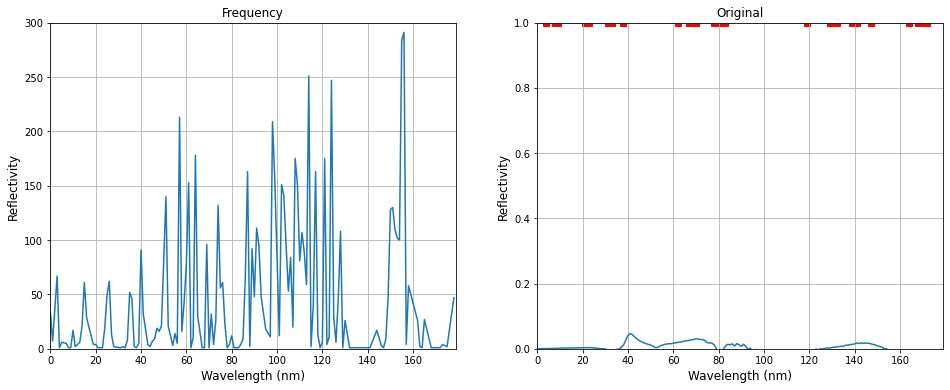

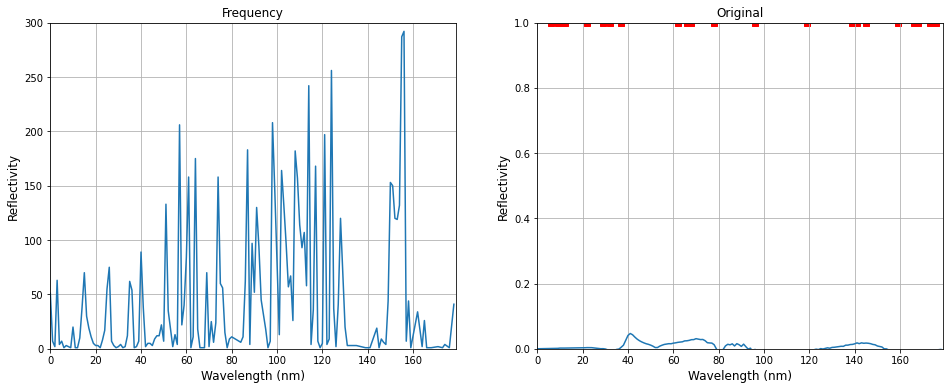

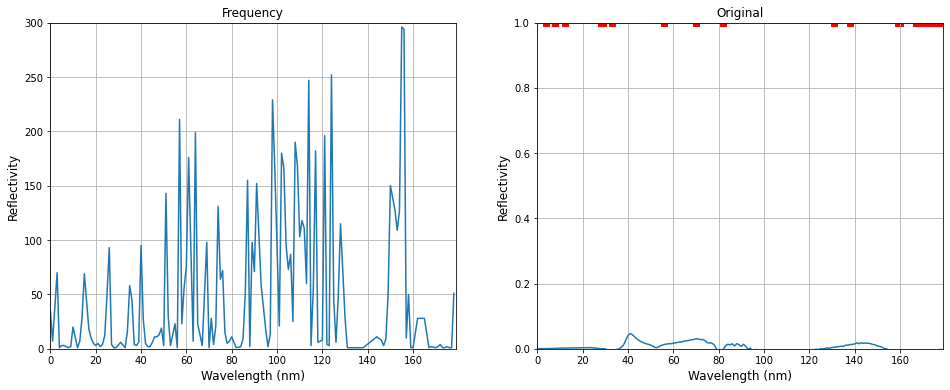

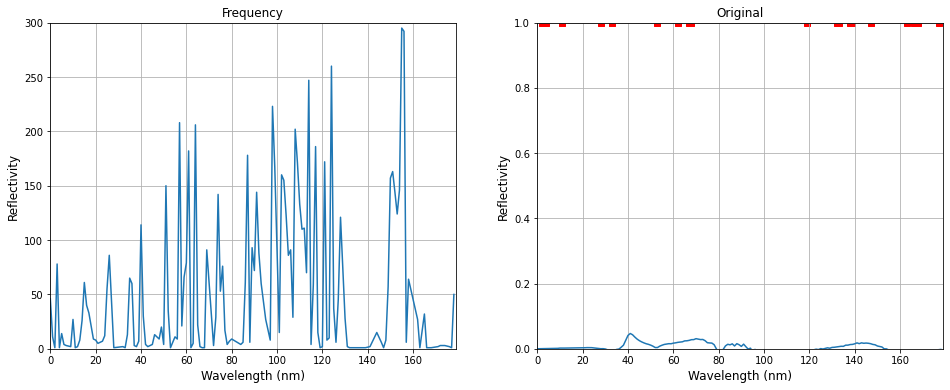

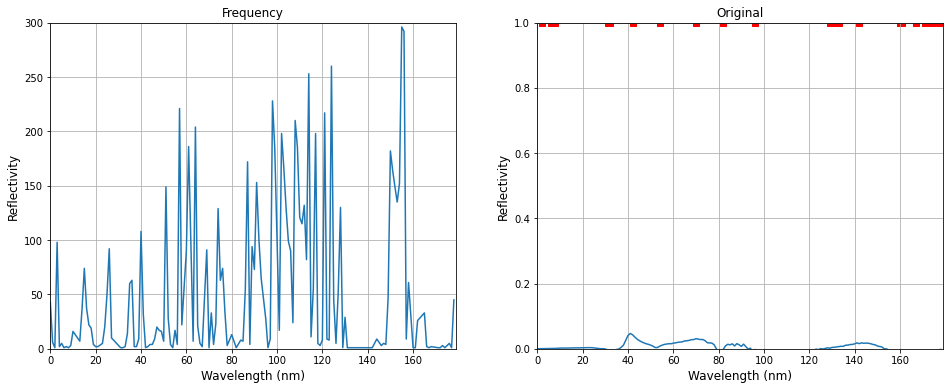

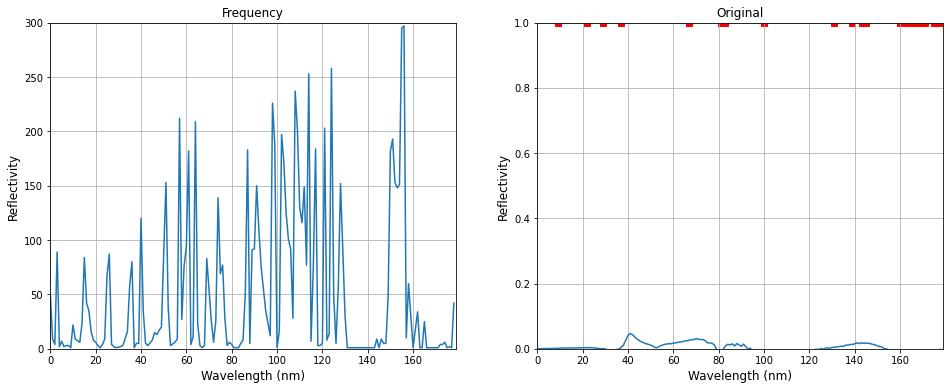

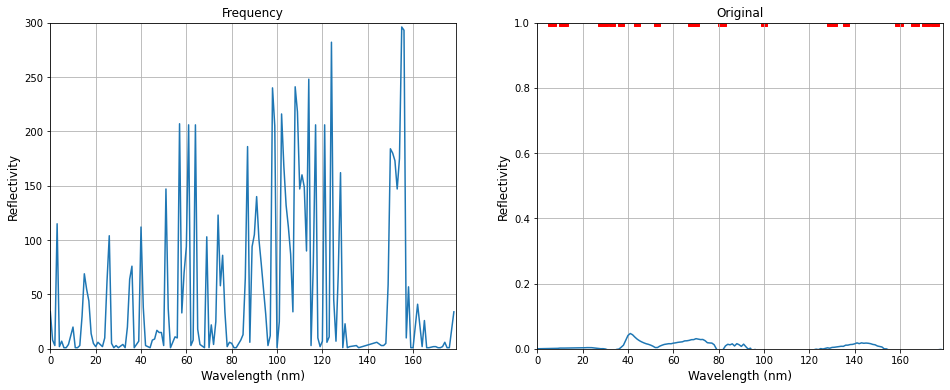

In [8]:
###########3.特征波段提取##########
#数据集划分 80个训练集，30个测试集
#3.1 SPA

from My_feature_selection import SPA
from collections import Counter
for j in range(2,30):
    result_all = []
    #运行500次
    for i in range(0,300):
        X_train1, X_test1, y_train1, y_test = train_test_split(X1, Y, test_size = 1/3, random_state = None)
        ####2.3SPA####
        spa_var_sel, spa_var_sel2, RMSEP_scree,XX = SPA().spa(X_train1, y_train1, m_min= j, m_max= 50, Xval = X_test1, yval = y_test, autoscaling=1)
        result_all = np.hstack((result_all, spa_var_sel)) 

    #计算次数    
    c,s = np.unique(result_all,return_counts=True)  
    Counter(result_all)
    print(j)
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    fonts = 12

    plt.plot(c, s, linewidth=1.5)
    plt.xlim(0, 179)
    plt.ylim(0, 300)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Frequency', fontsize=fonts)
    plt.grid(True)


    #var_selqwe = [11,16,113,53,126,69,49,118,137,83,129]
    plt.subplot(122)
    plt.plot(xx, X1[0, :], linewidth=1.5)
    plt.scatter(c, s, marker='s', color='r')
    plt.xlim(0, 179)
    plt.ylim(0, 1)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Original', fontsize=fonts)
    plt.grid(True)

    print(c)
    print(s)

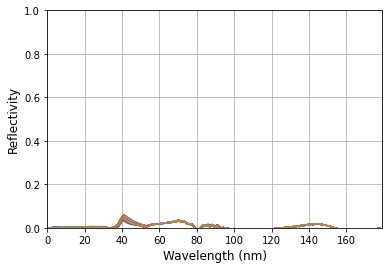

[[ 1.22839861e-04  2.37720191e-04  3.58178570e-04 ... -5.16630531e-03
  -2.71763360e-03 -1.92333544e-03]
 [ 3.39152264e-04  5.45763999e-04  8.27377121e-04 ... -5.42300461e-03
  -2.93948283e-03 -1.90207815e-03]
 [ 1.50262703e-04  2.50232385e-04  3.87825700e-04 ... -4.79680139e-03
  -2.48365891e-03 -1.73440606e-03]
 ...
 [ 2.64314000e-05  7.73691846e-05  1.10484837e-04 ... -5.80925585e-03
  -3.06371920e-03 -2.06172705e-03]
 [ 5.54607751e-06  6.13515885e-05  7.09524208e-05 ... -6.67830195e-03
  -3.56601437e-03 -2.29075786e-03]
 [ 4.29442818e-05  1.01192440e-04  1.44785700e-04 ... -6.99827316e-03
  -3.79773356e-03 -2.43145259e-03]]
[0.3601607  0.26398332 0.19304362 0.38354915 0.18930811 0.18524041
 0.24810284 0.44459668 0.25723177 0.07625719 0.08233689 0.13888055
 0.09922128 0.06055432 0.09912072 0.08762174 0.05630197 0.08079472
 0.06049365 0.0586127  0.1090803  0.13226792 0.0772028  0.04881792
 0.16126583 0.16445636 0.09427844 0.23077488 0.09980421 0.31471967
 0.54481792 0.31621128 0.5355

In [9]:
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/4_特征波段提取/SPA/nor_fd/5.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X1 = X2[:,0:-1]
Y = X2[:,-1]

#查看数据
fig1 = plt.figure()
fonts = 12
xx = np.arange(0, 179)
for i in range(X1.shape[0]):
    plt.plot(xx, X1[i, :], linewidth=1)
plt.xlim(0, 179)
plt.ylim(0, 1)
plt.xlabel('Wavelength (nm)', fontsize=fonts)
plt.ylabel('Reflectivity', fontsize=fonts)
plt.grid(True)
plt.show()
print(X1)
print(Y)
print(X1.shape)
print(Y.shape)

2
[  0.   1.   3.   5.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  34.
  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  49.  50.
  51.  52.  57.  58.  59.  61.  64.  69.  70.  71.  74.  76.  77.  86.
  87.  88.  89.  90.  91.  92.  95.  97.  98.  99. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 116. 117. 121. 124.
 125. 127. 128. 130. 132. 134. 138. 140. 142. 143. 144. 147. 149. 150.
 151. 152. 153. 154. 155. 156. 158. 160. 163. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178.]
[ 79   7 133   2   2  26   3  15  28 136  81   3   1   1   2   3   5   6
  15  23  14  11   5   2  10   5   4   6  15   7   6  19  12  54   3  13
  41  23   4   5   1   1   2   5   6   6   8   2   1   1   2   2  38  29
   1  10  14   1   3  17   9  17   1   4  18   1   2   2   7  15   2  20
   2  12   3   2   1   3   8   7   2  11   5   4   1   4  16   3   4   2
   1   2   1   2   1   2   1  34   6  

9
[  0.   1.   2.   3.   5.   8.  10.  11.  12.  13.  14.  15.  16.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  34.
  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  55.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  67.  68.  70.  72.  74.  75.  76.  77.  79.  80.  81.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  95.  96.  97.  98. 100. 101.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 116.
 117. 118. 121. 124. 127. 128. 130. 131. 132. 133. 134. 136. 138. 140.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 158. 161. 162. 164. 168. 169. 172. 173. 174. 175. 177.]
[110   2   1 130   3   1  14   4  21  43 140  67   9   1   1   3   6   5
   3  31  24  14   4   2  18  15   4  35  80  25   4  23  26 109  16  21
  37  30   3   1   1   1   2   1   7  11   2  65   3  34   3  19   1   2
  12   2   1   1   5   1  58   2  69   1   2   1   2   5   3   2  24  59
   1 

16
[  0.   1.   2.   3.   4.   5.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  67.  70.  72.  73.  74.  75.  76.  77.  78.  79.  80.
  81.  83.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 121. 124. 125. 127. 128. 130.
 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 158. 159. 160.
 162. 163. 164. 165. 166. 169. 170. 171. 172. 173. 174. 175. 176. 177.
 178.]
[104  13   1 166   1   7  16   1   8  34 157  68   9   5   4   2   6  10
   6   7  13  10  16   1   2   7  10   6  74  96  44   2  32  34 114  33
  19  38  23   6   8   6   3  12   2  12  36   3   3   3 118  1

22
[  0.   1.   3.   4.   5.   6.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  29.  30.  31.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  74.  75.  76.
  77.  78.  80.  85.  86.  87.  89.  90.  91.  92.  93.  95.  97.  98.
  99. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 116. 117. 118. 119. 120. 121. 124. 125. 126. 127. 128. 129. 130.
 131. 132. 133. 134. 136. 137. 138. 139. 140. 141. 142. 144. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 158. 160. 162. 163. 164.
 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178.]
[ 75  15 196   4   9   1   8   2   1  17 165  87   7   9   2   1   8  10
   5  14   4  16  15   2   5   3   1   2  87 117  54   4  32  31 142  39
  26  38  40   5   1   4   4   7  12  25  51   3   1   8   8 116  26 151
 

28
[  0.   1.   2.   3.   4.   5.   6.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  29.  30.  31.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  84.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 116. 117. 118. 119. 121. 123.
 124. 125. 127. 128. 129. 130. 131. 132. 133. 134. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178.]
[ 66  12   2 204   5   7   1  11   1   3  11 153  94  16   5   8   2   3
   5   5   8   3  37  31   3   5   2   2  81 123  53   2  22  25 146  62
  18  49  35   9  

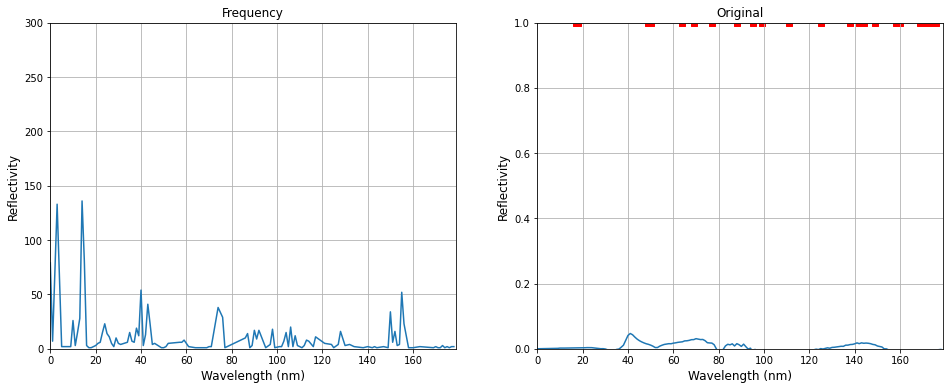

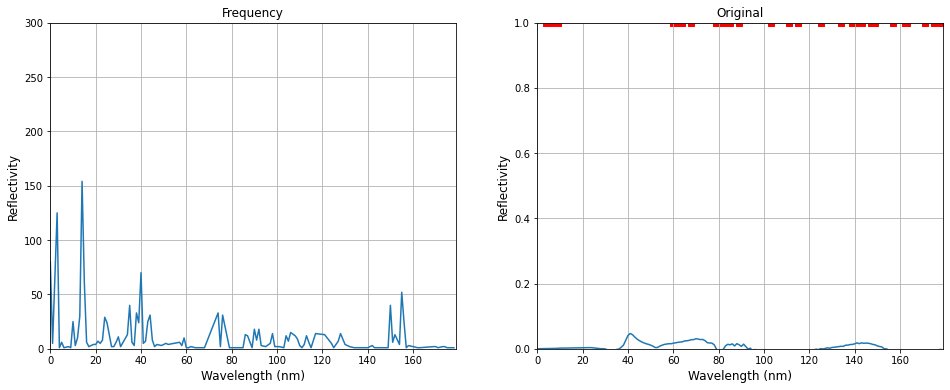

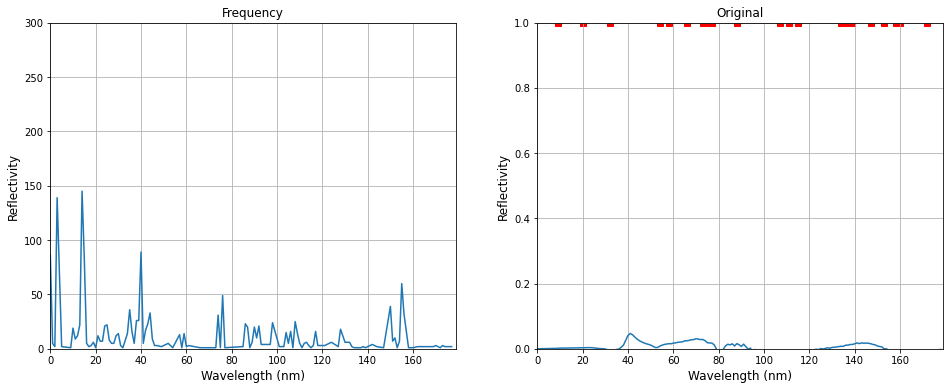

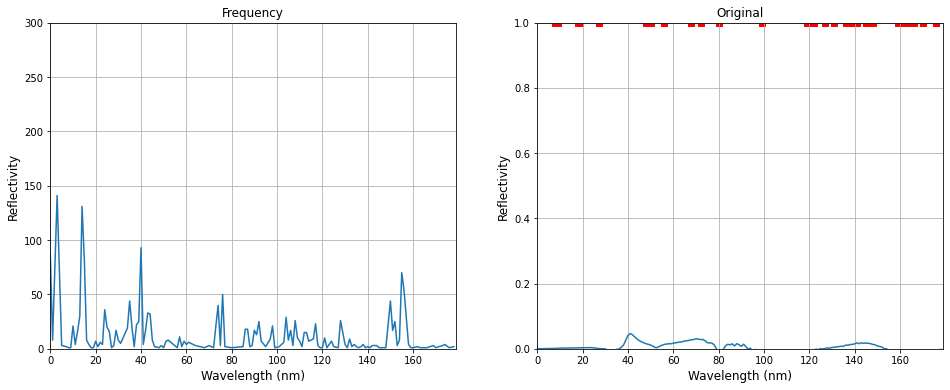

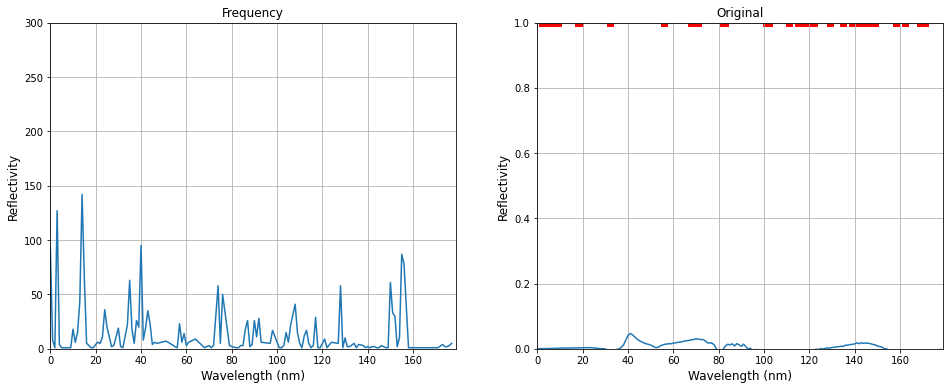

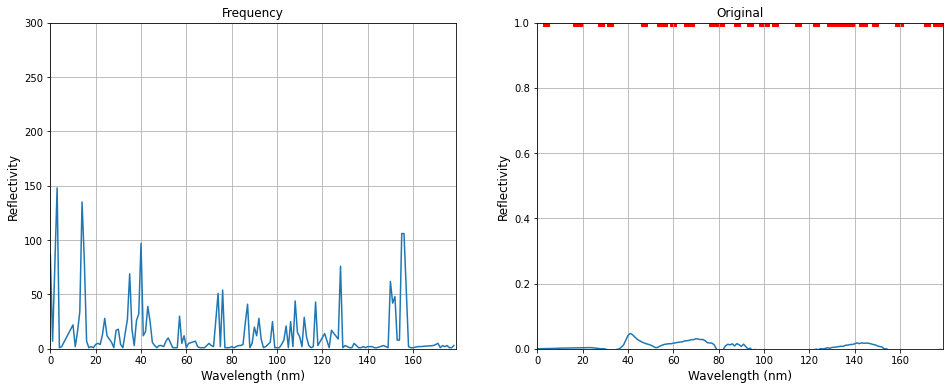

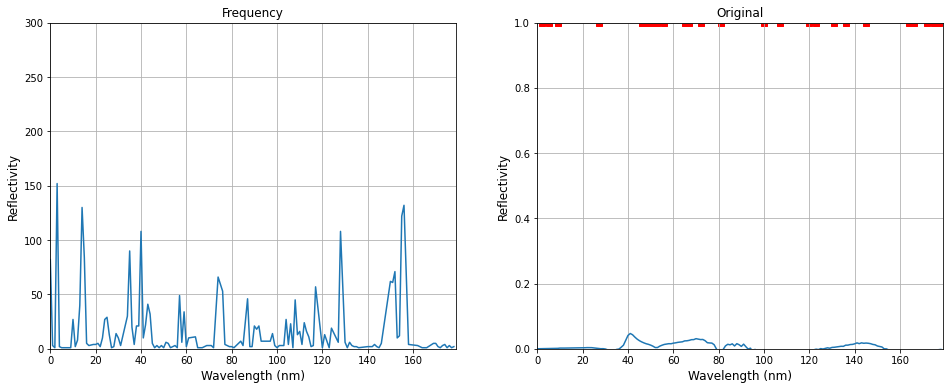

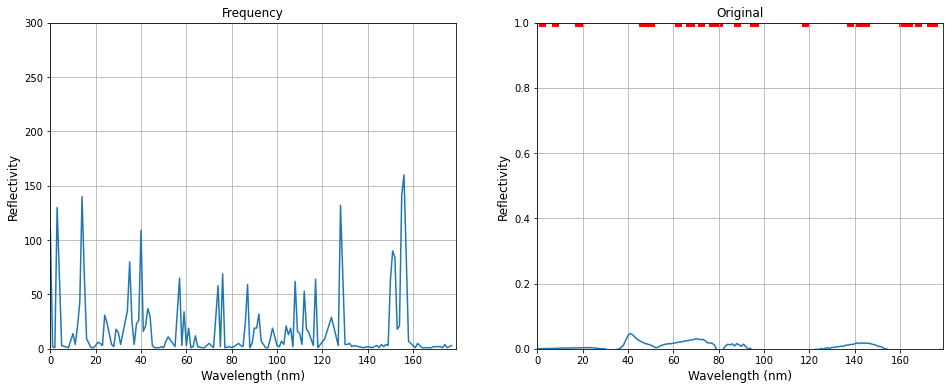

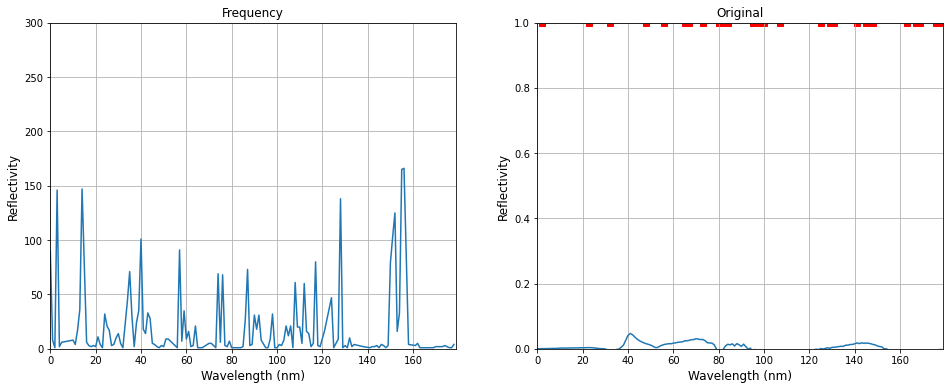

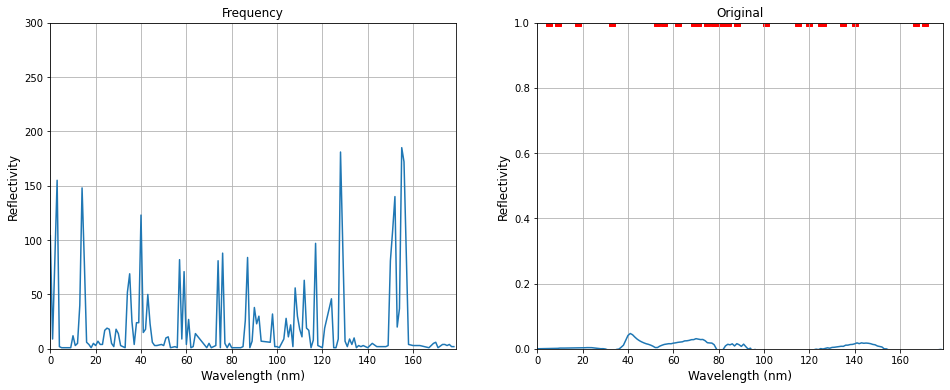

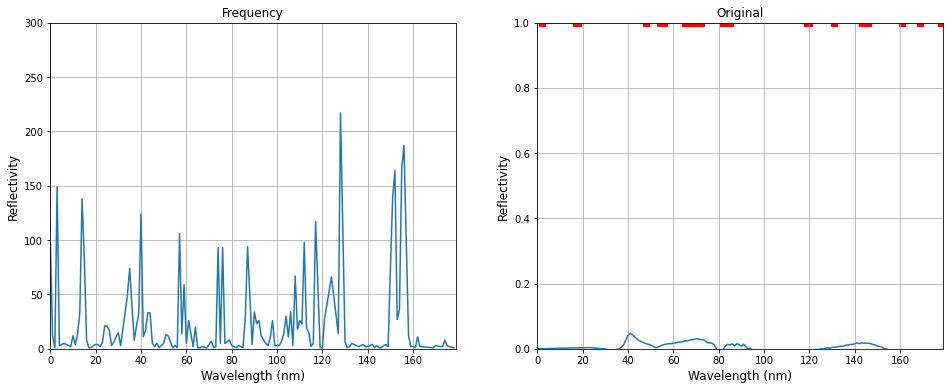

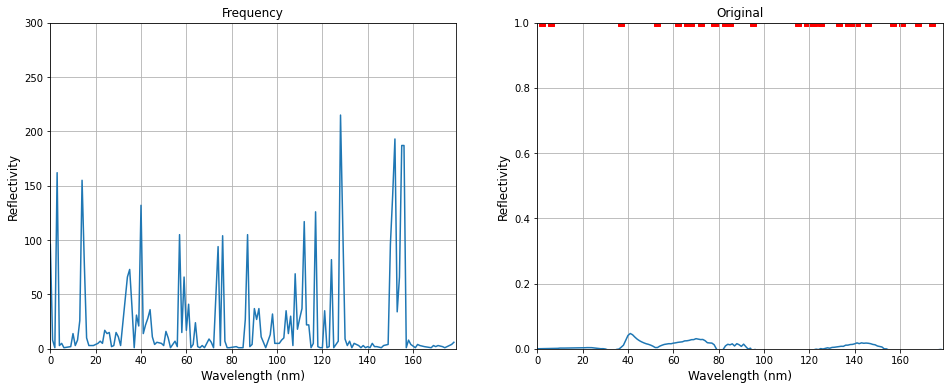

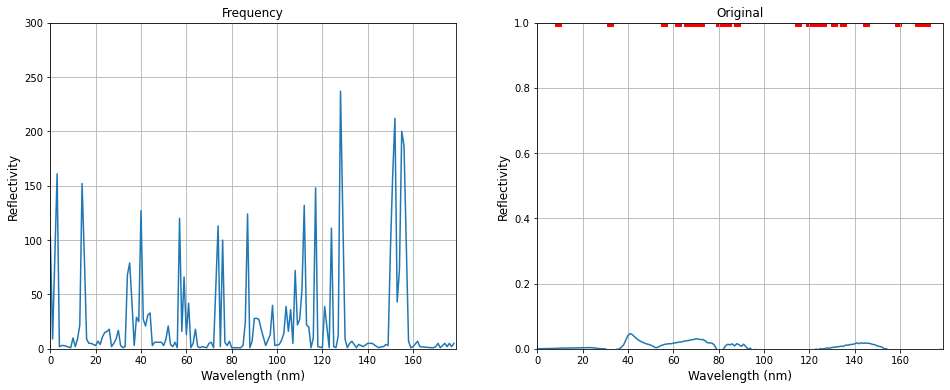

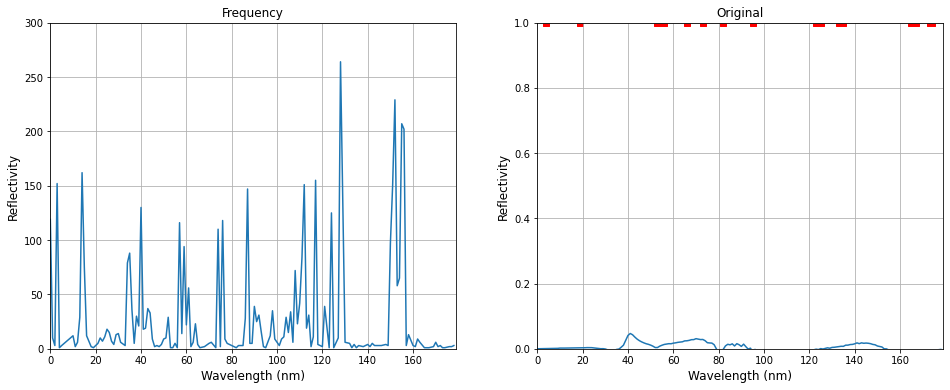

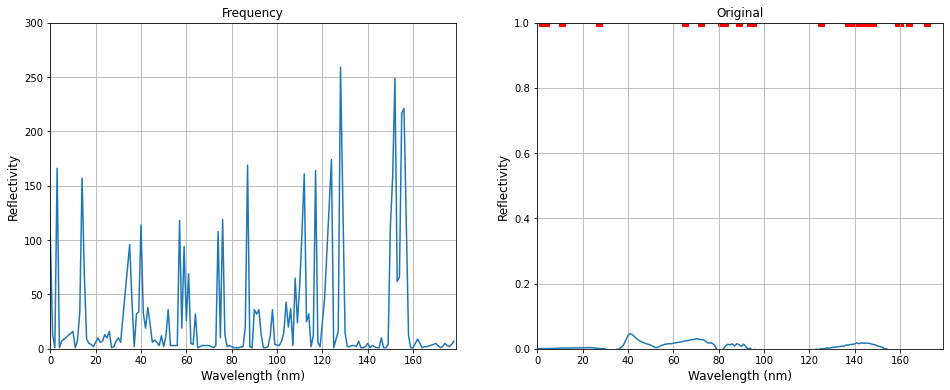

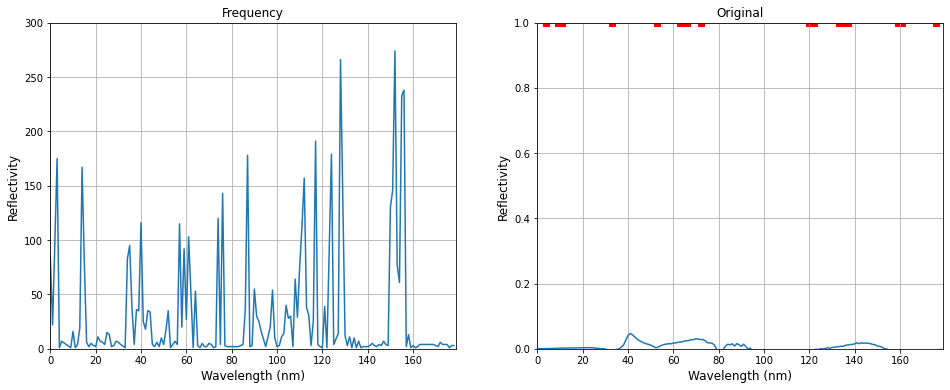

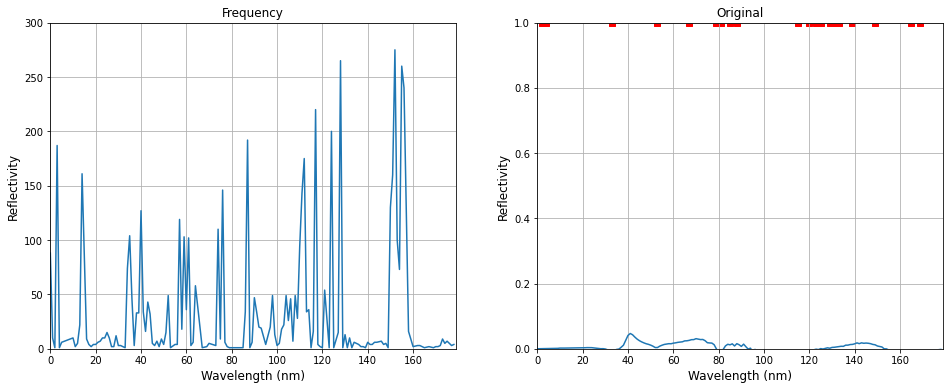

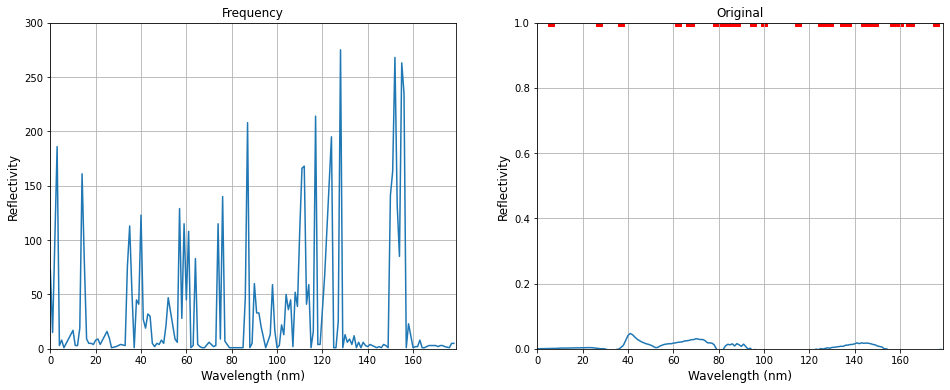

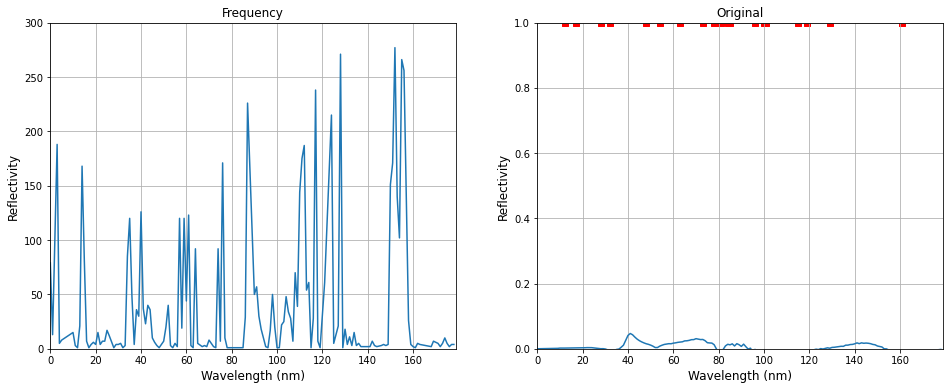

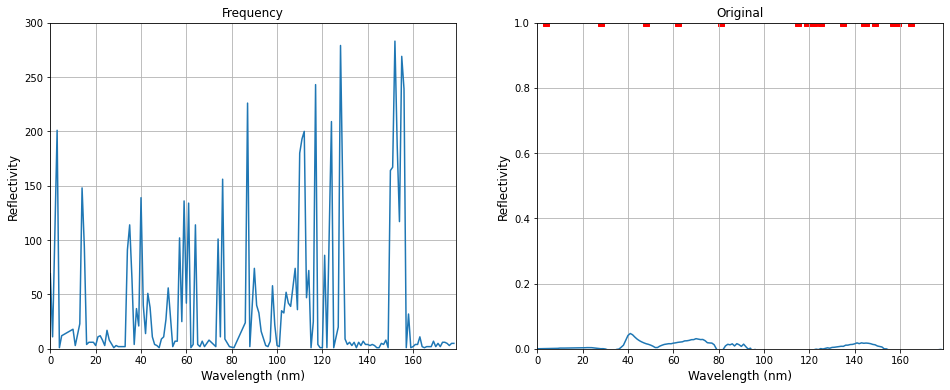

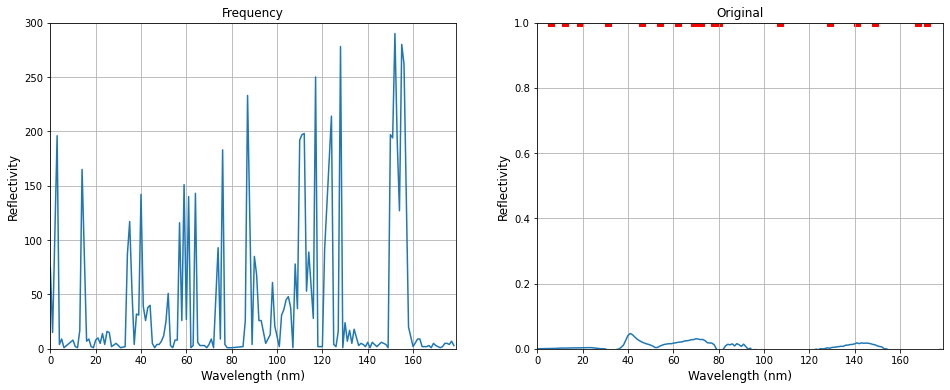

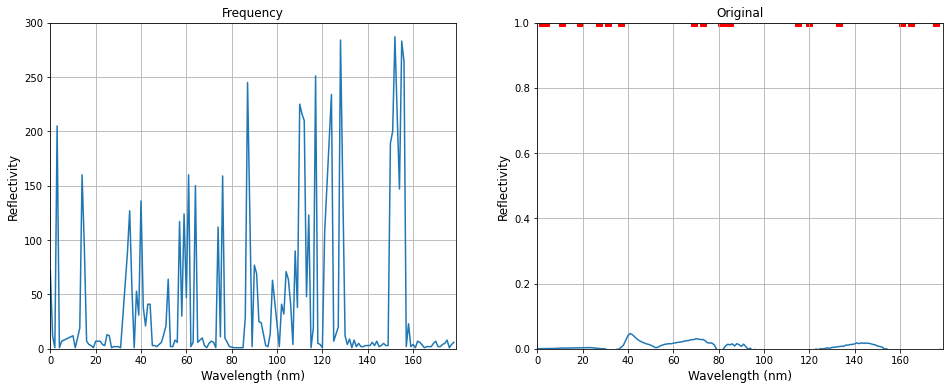

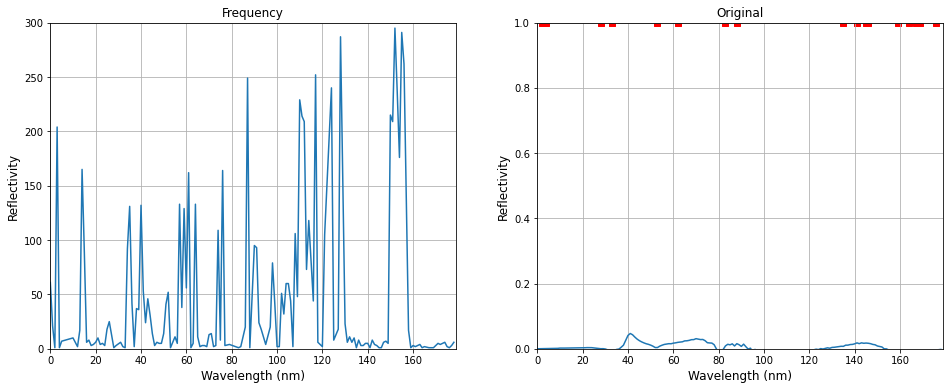

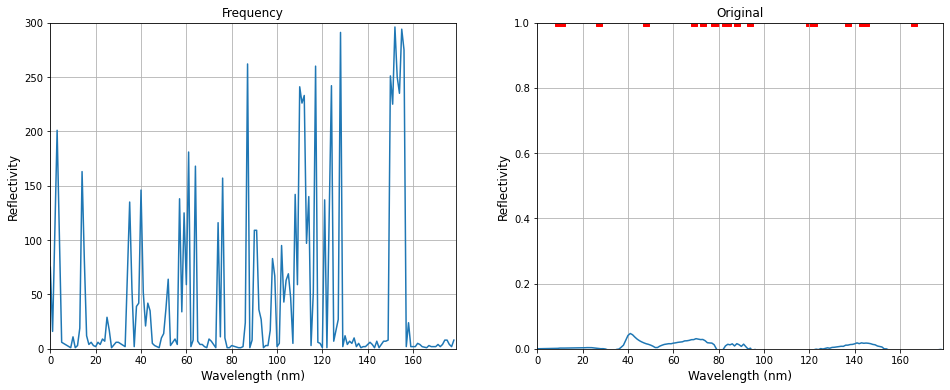

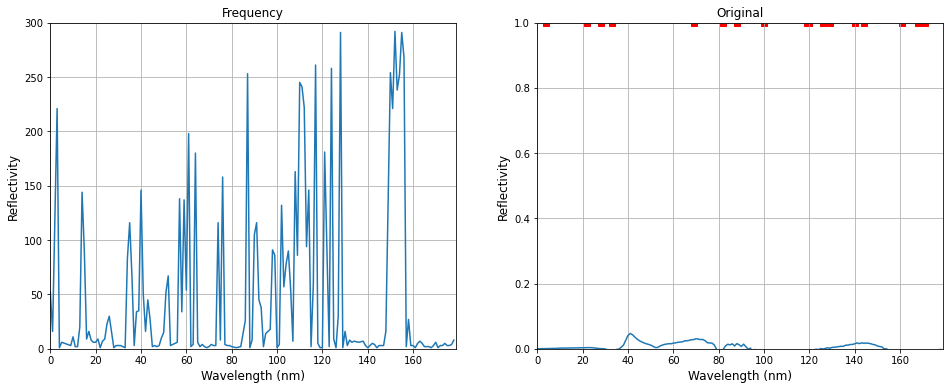

In [10]:
from My_feature_selection import SPA
from collections import Counter
for j in range(2,30):
    result_all = []
    #运行500次
    for i in range(0,300):
        X_train1, X_test1, y_train1, y_test = train_test_split(X1, Y, test_size = 1/3, random_state = None)
        ####2.3SPA####
        spa_var_sel, spa_var_sel2, RMSEP_scree,XX = SPA().spa(X_train1, y_train1, m_min= j, m_max= 50, Xval = X_test1, yval = y_test, autoscaling=1)
        result_all = np.hstack((result_all, spa_var_sel)) 

    #计算次数    
    c,s = np.unique(result_all,return_counts=True)  
    Counter(result_all)
    print(j)
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    fonts = 12
    plt.plot(c, s, linewidth=1.5)
    plt.xlim(0, 179)
    plt.ylim(0, 300)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Frequency', fontsize=fonts)
    plt.grid(True)


    #var_selqwe = [11,16,113,53,126,69,49,118,137,83,129]
    plt.subplot(122)
    plt.plot(xx, X1[0, :], linewidth=1.5)
    plt.scatter(c, s, marker='s', color='r')
    plt.xlim(0, 179)
    plt.ylim(0, 1)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Original', fontsize=fonts)
    plt.grid(True)

    print(c)
    print(s)

In [11]:
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/4_特征波段提取/SPA/nor_msc/2.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X1 = X2[:,0:-1]
Y = X2[:,-1]

#查看数据
fig1 = plt.figure()
fonts = 12
xx = np.arange(0, 180)
for i in range(X1.shape[0]):
    plt.plot(xx, X1[i, :], linewidth=1)
plt.xlim(0, 180)
plt.ylim(0, 1)
plt.xlabel('Wavelength (nm)', fontsize=fonts)
plt.ylabel('Reflectivity', fontsize=fonts)
plt.grid(True)
plt.show()
print(X1)
print(Y)
print(X1.shape)
print(Y.shape)

[[ 2.23108820e-03  2.35607383e-03  2.59794652e-03 ...  1.21505725e-02
   9.38546724e-03  7.42853495e-03]
 [-2.39148932e-03 -2.05839745e-03 -1.52238582e-03 ...  3.26131376e-03
   3.74357186e-04 -1.49373231e-03]
 [ 3.92406207e-03  4.07161567e-03  4.31733659e-03 ...  1.21698559e-02
   9.73097513e-03  8.02783884e-03]
 ...
 [ 2.66533802e-03  2.69179536e-03  2.76924049e-03 ...  1.38853514e-02
   1.08186251e-02  8.75487443e-03]
 [-1.07736498e-03 -1.07182237e-03 -1.01050902e-03 ...  1.10793920e-02
   7.51560075e-03  5.22627101e-03]
 [-8.24221171e-03 -8.19887876e-03 -8.09677047e-03 ...  6.30665976e-03
   2.47455452e-03  2.10958810e-05]]
[19.5 18.7 17.7 18.6 19.8 17.9 18.9 18.5 18.5 17.5 17.1 17.  16.7 18.7
 18.  17.  17.9 18.8 19.  18.2 18.4 18.8 19.  18.9 16.7 17.2 17.9 19.
 17.2 18.9 19.4 18.6 19.8 19.6 19.3 17.6 18.5 18.7 19.2 18.3 18.  18.6
 17.  18.5 17.2 17.2 18.3 18.3 17.5 17.8 18.1 18.3 15.6 18.9 18.9 18.1
 18.1 16.9 17.2 17.4 17.8 18.8 16.9 17.1 18.8 16.7 19.5 16.8 18.3 18.2
 17.8 16.4

2
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  40.  41.  42.  43.
  44.  45.  46.  47.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  67.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 122. 124. 125. 126. 127. 128. 130. 131. 132. 133. 135. 136. 137.
 138. 139. 140. 141. 142. 143. 145. 146. 147. 148. 149. 150. 151. 152.
 154. 155. 156. 158. 159. 160. 161. 162. 163. 164. 165. 166. 170. 171.
 172. 173. 174. 175. 176. 177. 178. 179.]
[ 96  37   3   3  25  71  28   7  11  11  20   4   1   5  61 117  32  26
   7   1   9   1   5 110  57  14  21   2  67  63   6   9  85  13   6   7
 184  63  25  33  47 146  67 

8
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  63.  67.  68.  69.  75.  76.  77.  78.  79.  80.
  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.
  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108.
 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122.
 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137.
 138. 139. 140. 141. 143. 145. 146. 147. 148. 149. 150. 152. 154. 155.
 156. 158. 159. 161. 162. 163. 164. 165. 169. 170. 171. 172. 174. 175.
 176. 177. 178. 179.]
[ 87  37   3   5  29  58  28   9   6  12  28   3   1   2   9  56 108  26
  26   5   3   3   5 102  57   8  22   7  76  59   4  10  83   4   8   7
 183  51   1  28  19  64 131  60  34  40  10   1 

14
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  67.  69.  75.  76.  77.  78.  79.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 122. 124. 125. 126.
 127. 128. 131. 133. 134. 135. 136. 137. 138. 139. 140. 141. 143. 145.
 146. 147. 148. 149. 150. 151. 152. 154. 155. 156. 157. 158. 159. 160.
 162. 163. 164. 165. 168. 170. 171. 172. 174. 175. 176. 177. 178. 179.]
[ 92  48   2   9  19  64  35  12   8  11  29   5   3   2  11  61 118  35
  20   4   5   1   3 133  50  12  18   4  76  65   2   6 105   4   7   7
 205  50  28  24  48 161  67  27  57   9   1   1 120  92   3   8   4 

20
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  63.  67.  71.  72.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 122.
 124. 125. 126. 127. 128. 131. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 145. 146. 147. 148. 149. 150. 151. 152. 154. 155. 156.
 158. 159. 160. 162. 164. 165. 168. 170. 171. 172. 174. 175. 176. 177.
 178. 179.]
[100  44   3   2  21  65  31   8  10  14  28   3   2   1   2  63 111  34
  22  10   1   4   5 131  61  15  20   6  94  63   6   8  96   3   7   5
 195  59   1  26  27  50 147  67  36  61   7   1 138 113  

26
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  23.  24.  25.  26.  27.  28.
  29.  30.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  63.  65.  67.  68.  70.  73.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 133. 134. 135. 136.
 137. 138. 139. 140. 143. 145. 146. 147. 148. 149. 150. 151. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 164. 165. 168. 169. 170. 171.
 172. 173. 174. 175. 176. 177. 178. 179.]
[109  52   1   7  25  45  43  18  10  20  33   6   1   1   7  72 109  38
  34   7   2   3   9 134  63  25  24   5 104  77  23 145   5   8   8 188
  62   1  24  36  71 157  75

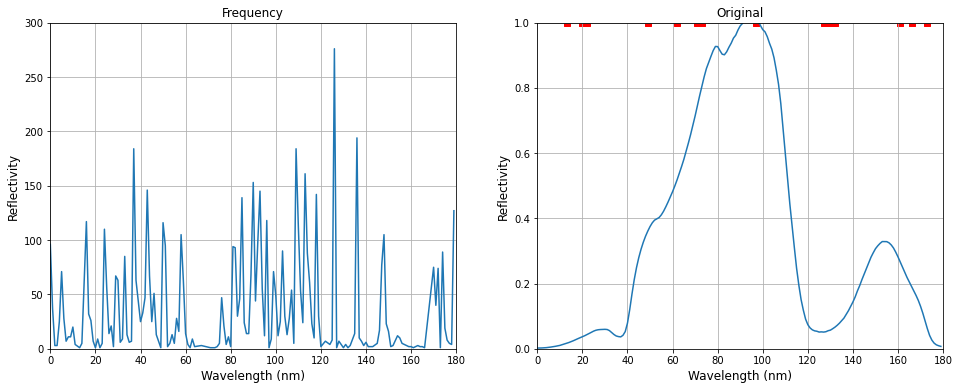

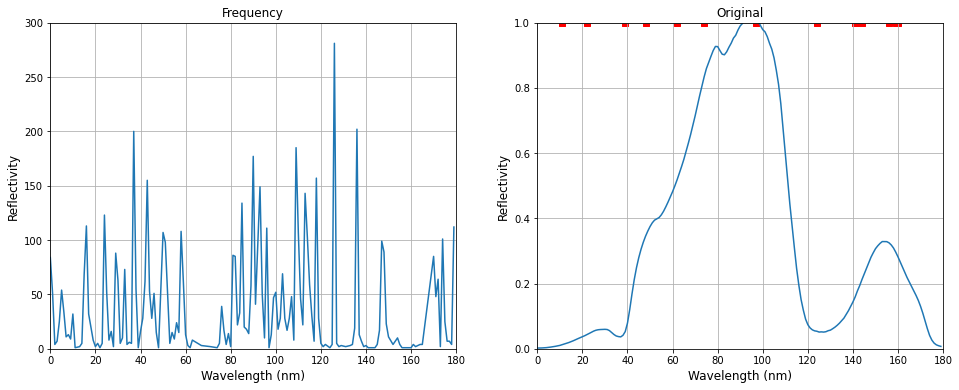

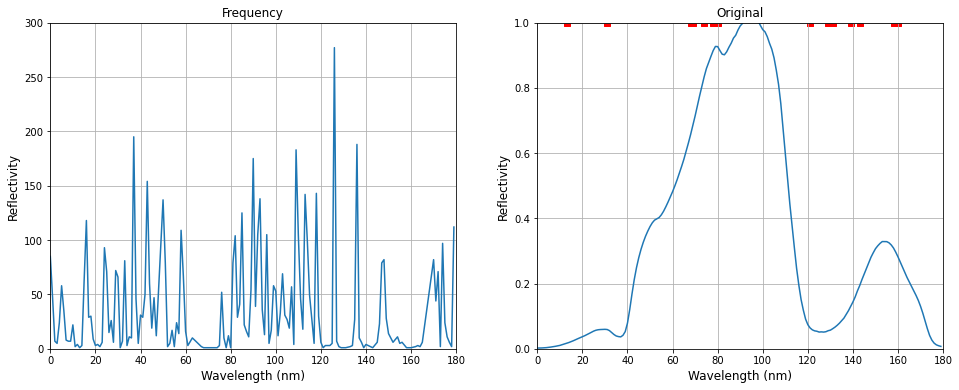

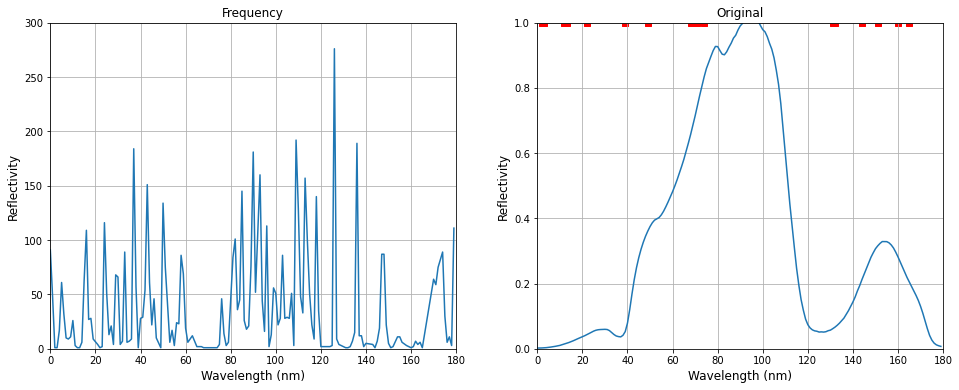

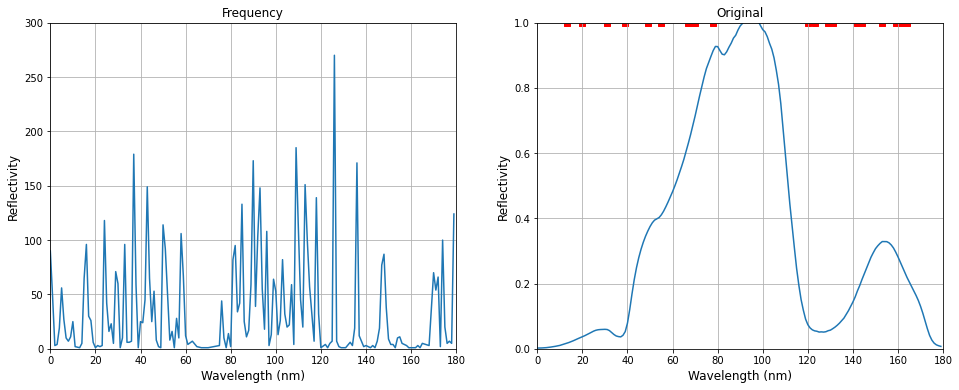

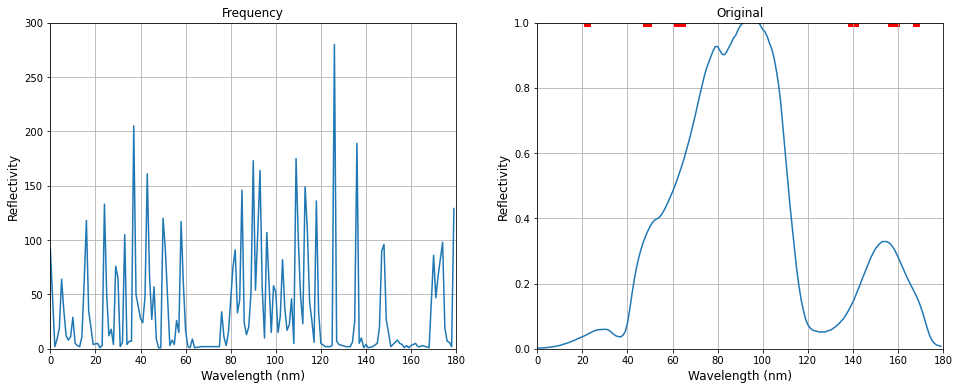

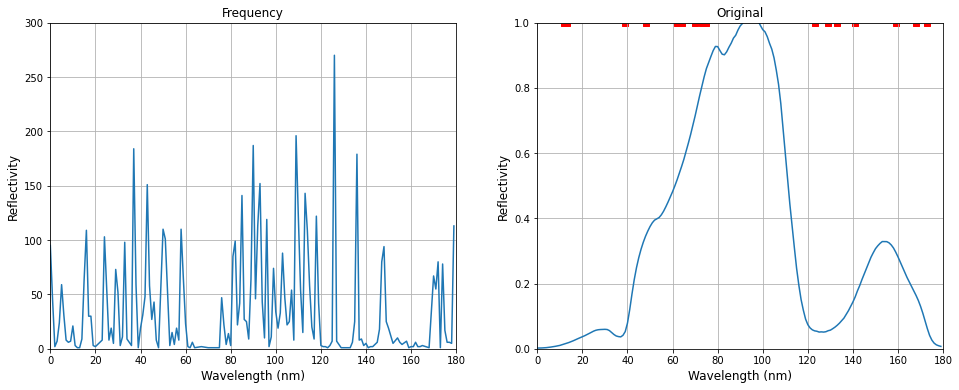

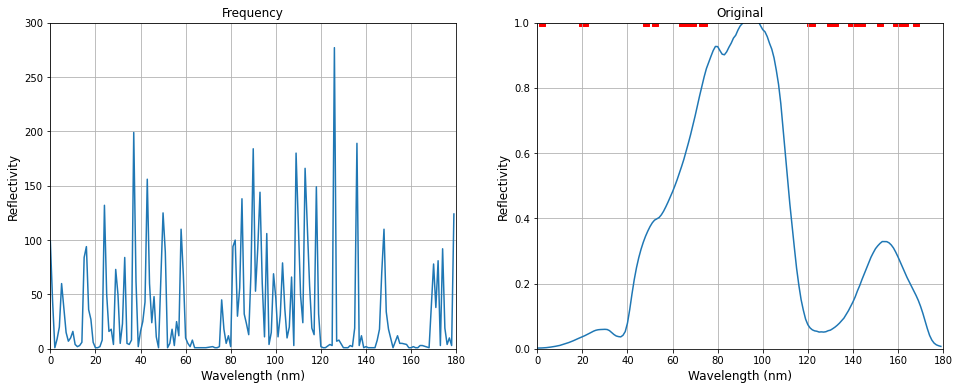

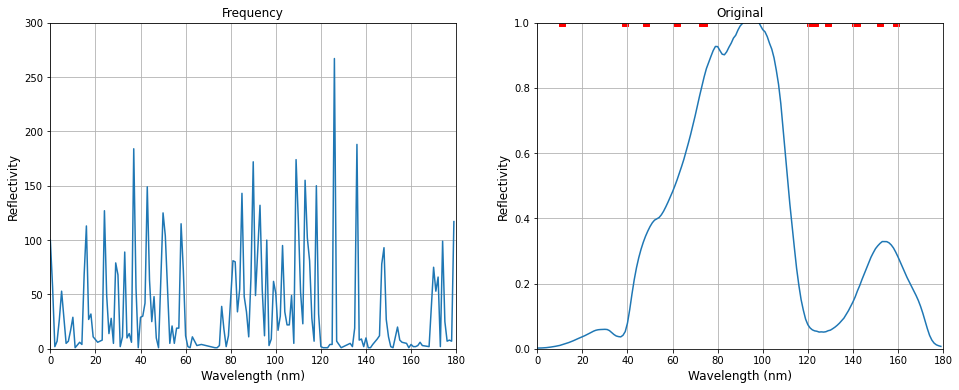

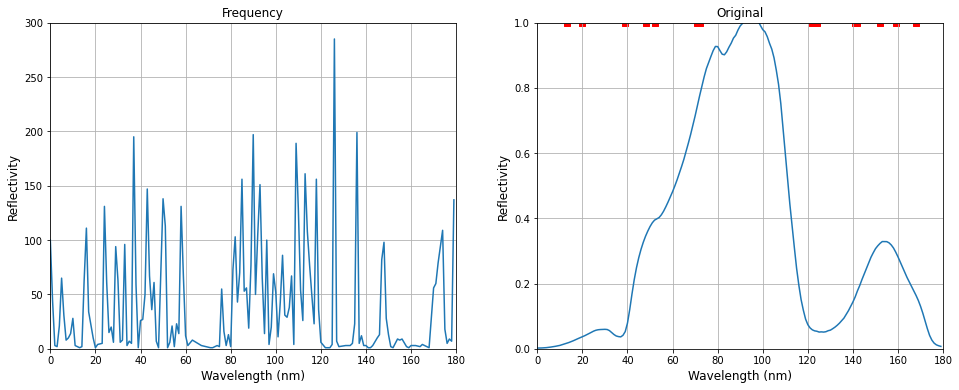

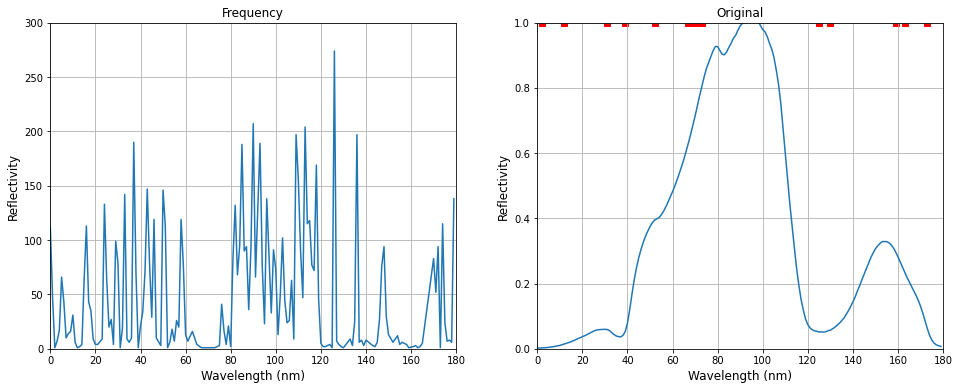

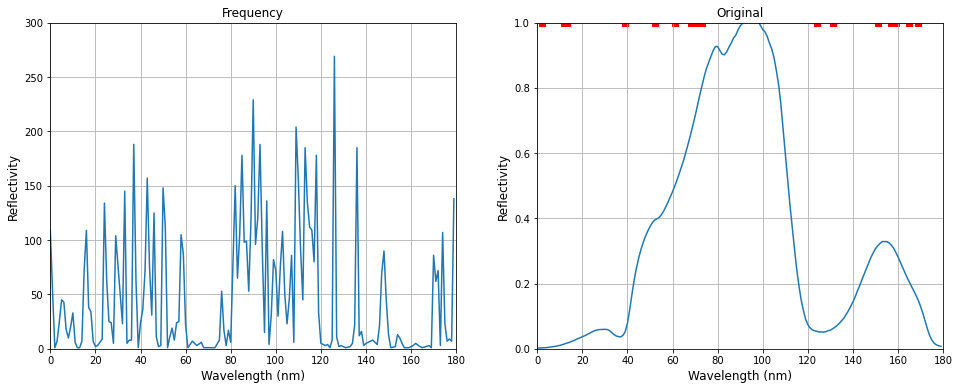

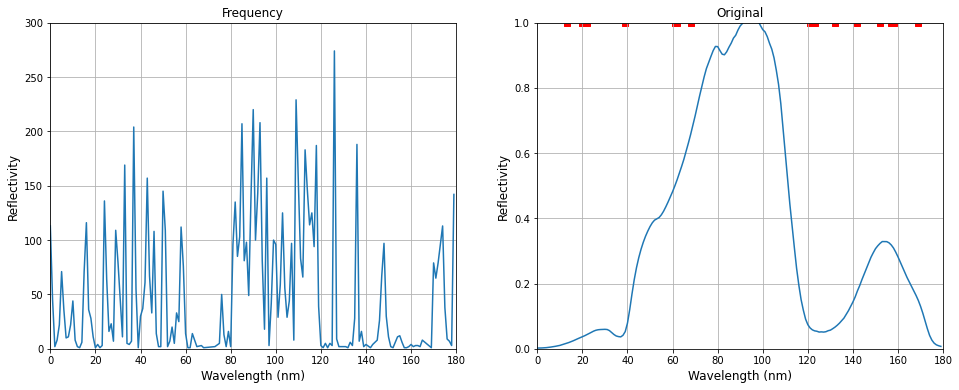

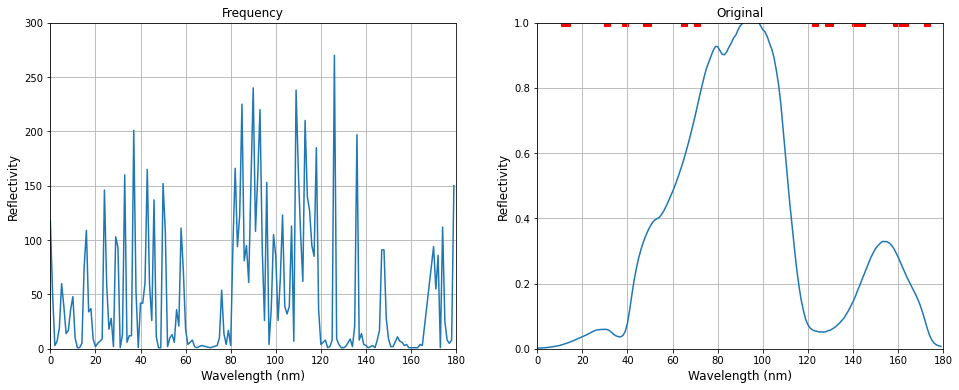

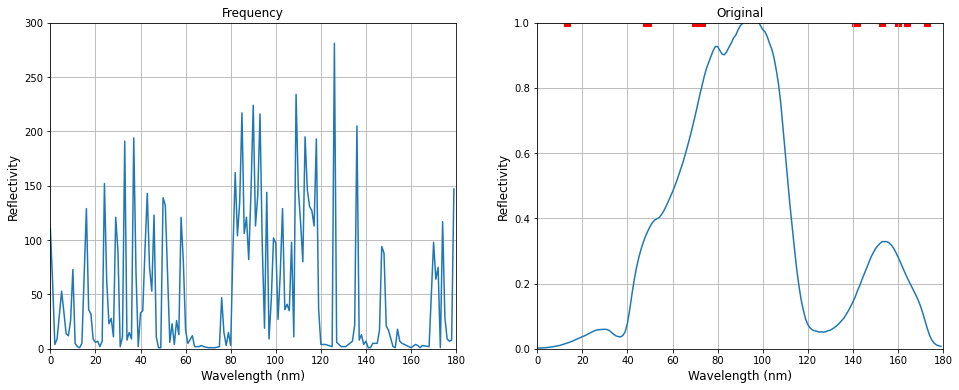

In [12]:
from My_feature_selection import SPA
from collections import Counter
for j in range(2,30):
    result_all = []
    #运行500次
    for i in range(0,300):
        X_train1, X_test1, y_train1, y_test = train_test_split(X1, Y, test_size = 1/3, random_state = None)
        ####2.3SPA####
        spa_var_sel, spa_var_sel2, RMSEP_scree,XX = SPA().spa(X_train1, y_train1, m_min= j, m_max= 50, Xval = X_test1, yval = y_test, autoscaling=1)
        result_all = np.hstack((result_all, spa_var_sel)) 

    #计算次数    
    c,s = np.unique(result_all,return_counts=True)  
    Counter(result_all)
    print(j)
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    fonts = 12
    plt.plot(c, s, linewidth=1.5)
    plt.xlim(0, 180)
    plt.ylim(0, 300)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Frequency', fontsize=fonts)
    plt.grid(True)


    #var_selqwe = [11,16,113,53,126,69,49,118,137,83,129]
    plt.subplot(122)
    plt.plot(xx, X1[0, :], linewidth=1.5)
    plt.scatter(c, s, marker='s', color='r')
    plt.xlim(0, 180)
    plt.ylim(0, 1)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Original', fontsize=fonts)
    plt.grid(True)

    print(c)
    print(s)

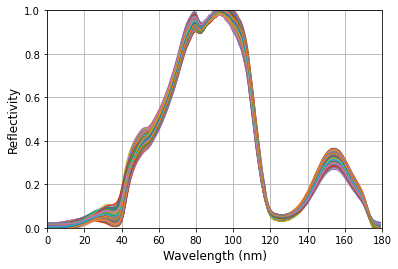

[[ 2.29704132e-03  2.42205347e-03  2.66397748e-03 ...  1.22186303e-02
   9.45293832e-03  7.49559082e-03]
 [-2.30118984e-03 -1.96805139e-03 -1.43196483e-03 ...  3.35240357e-03
   4.65043367e-04 -1.40330731e-03]
 [ 4.01298724e-03  4.16056244e-03  4.40631933e-03 ...  1.22599881e-02
   9.82075032e-03  8.11736472e-03]
 ...
 [ 2.73462421e-03  2.76108692e-03  2.83854775e-03 ...  1.39569128e-02
   1.08895646e-02  8.82539543e-03]
 [-1.01177455e-03 -1.00623076e-03 -9.44904471e-04 ...  1.11475499e-02
   7.58300601e-03  5.29319276e-03]
 [-8.18280068e-03 -8.13945801e-03 -8.03732682e-03 ...  6.36933426e-03
   2.53636943e-03  8.23604568e-05]]
[0.3601607  0.26398332 0.19304362 0.38354915 0.18930811 0.18524041
 0.24810284 0.44459668 0.25723177 0.07625719 0.08233689 0.13888055
 0.09922128 0.06055432 0.09912072 0.08762174 0.05630197 0.08079472
 0.06049365 0.0586127  0.1090803  0.13226792 0.0772028  0.04881792
 0.16126583 0.16445636 0.09427844 0.23077488 0.09980421 0.31471967
 0.54481792 0.31621128 0.5355

In [13]:
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/4_特征波段提取/SPA/nor_msc/5.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X1 = X2[:,0:-1]
Y = X2[:,-1]

#查看数据
fig1 = plt.figure()
fonts = 12
xx = np.arange(0, 180)
for i in range(X1.shape[0]):
    plt.plot(xx, X1[i, :], linewidth=1)
plt.xlim(0, 180)
plt.ylim(0, 1)
plt.xlabel('Wavelength (nm)', fontsize=fonts)
plt.ylabel('Reflectivity', fontsize=fonts)
plt.grid(True)
plt.show()
print(X1)
print(Y)
print(X1.shape)
print(Y.shape)

2
[  0.   1.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  36.  37.  38.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  55.  57.  58.  59.  62.
  63.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  79.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109.
 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 122. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 143. 147. 149. 151. 152. 153. 154. 155. 156. 157. 158. 160.
 164. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178.
 179.]
[ 24   4   2   4  21  28  19  21  12  23  14   7   5   7  25  51  85  58
  12   3   3   3   9  13  18  18  24   6  15   3   8  22   8   1  18  49
  54   3  22  45 105  21  33 100  10   6   1  39  27   2   2   2

8
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  53.  55.  56.  57.  58.
  59.  60.  61.  64.  65.  66.  67.  68.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 122. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136.
 137. 138. 139. 140. 141. 143. 144. 146. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 160. 161. 164. 165. 166. 168. 170. 171. 172.
 173. 174. 175. 176. 177. 178. 179.]
[ 27   8   1   2   3  11  33  23  40  19  29  13   8   1   7  33  63  71
  60  19  10   3   4   7  27  21  31  28  12  15   6   6  13   7   1   5
  15  66  73   1  25  54 115  20  

14
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  50.  51.  52.  53.  55.  56.  57.  58.
  59.  60.  61.  63.  66.  67.  68.  69.  70.  71.  73.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 133. 134.
 135. 136. 137. 138. 139. 140. 141. 143. 144. 145. 147. 150. 152. 154.
 155. 156. 157. 158. 160. 161. 164. 165. 166. 168. 169. 170. 171. 172.
 173. 174. 175. 176. 177. 178. 179.]
[ 33   9   1   5  13  30  22  23  35  19  35  14   8   4  13  33  66  56
  54  29  10  11  12  15  37  30  26  35  22  39   8   1   9   6   3  31
  96  81   3   2  23  40 173  44 

20
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  62.  64.  65.  66.  67.  68.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 121. 122. 124. 125. 126. 127. 128. 129.
 131. 132. 134. 135. 136. 137. 138. 139. 141. 142. 143. 144. 145. 146.
 148. 149. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 163.
 164. 165. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178.
 179.]
[ 46  13   1   6  10  48  50  22  43  32  37  26   3   4  11  42  68  73
  55  24   7  10  10  19  67  48  49  34  17 106  34   5   9  21 

26
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  54.  55.  56.
  57.  58.  59.  60.  62.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128.
 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 144.
 145. 146. 147. 148. 149. 151. 152. 153. 154. 155. 156. 158. 159. 161.
 162. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176.
 177. 178. 179.]
[ 86  32   6   6  14  61  64   6  30  30  56  51  13  10  10  30 102  66
  42  24   6  14  18  36  96  76  32  28  23 177  34   

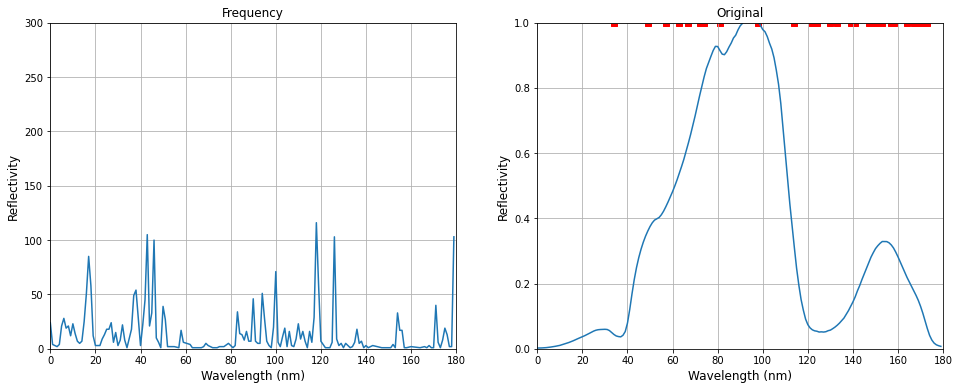

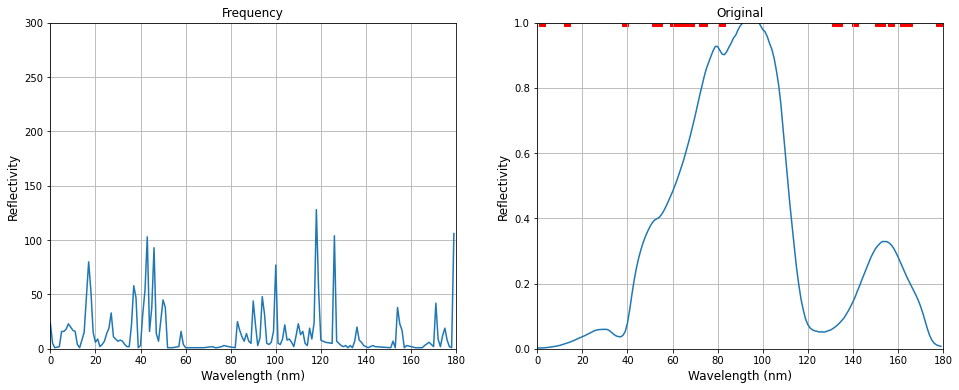

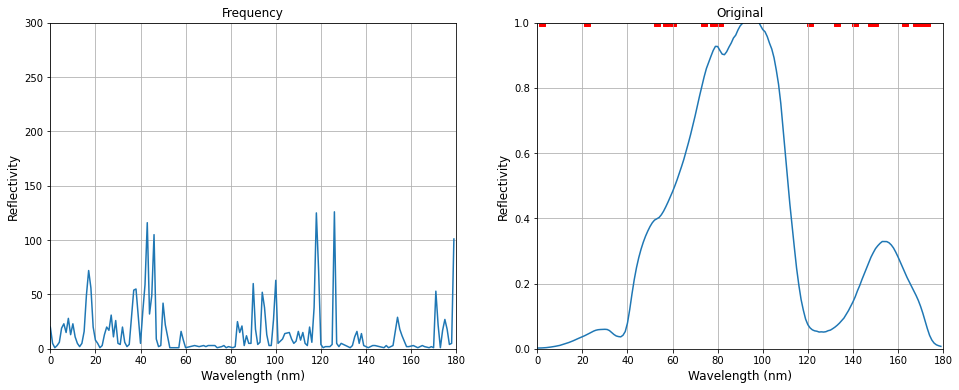

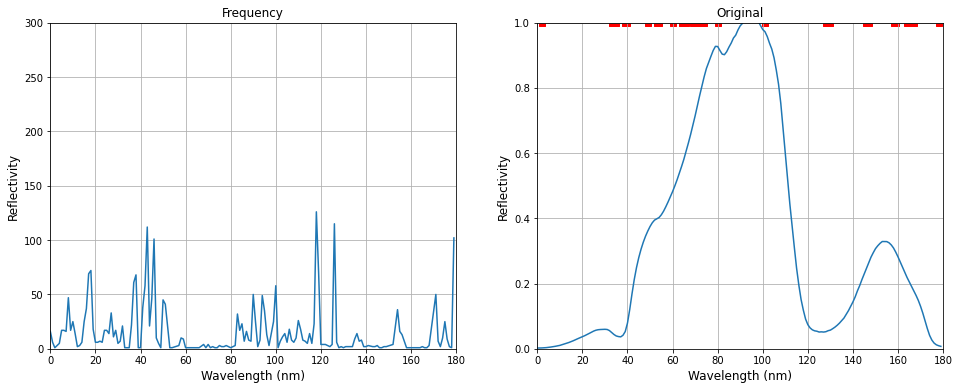

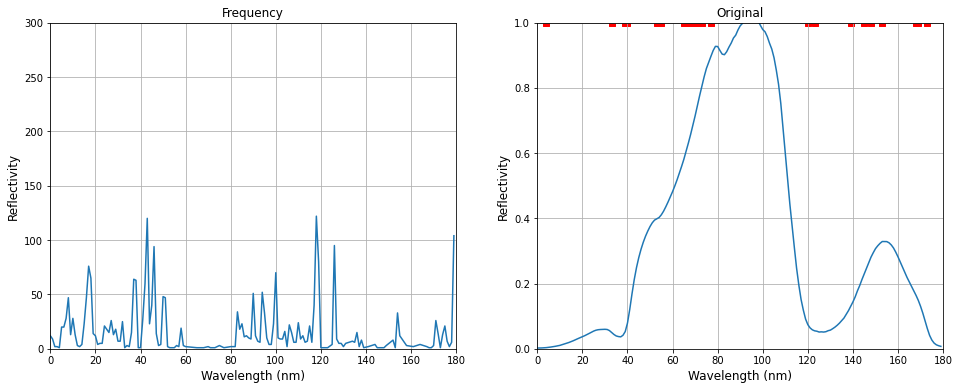

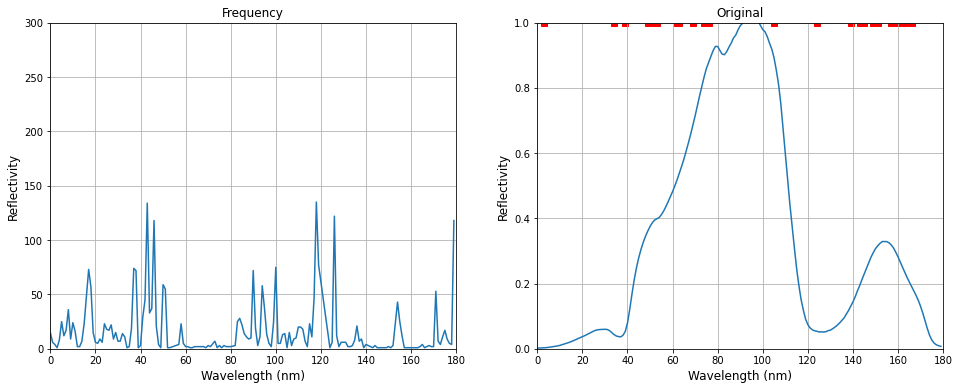

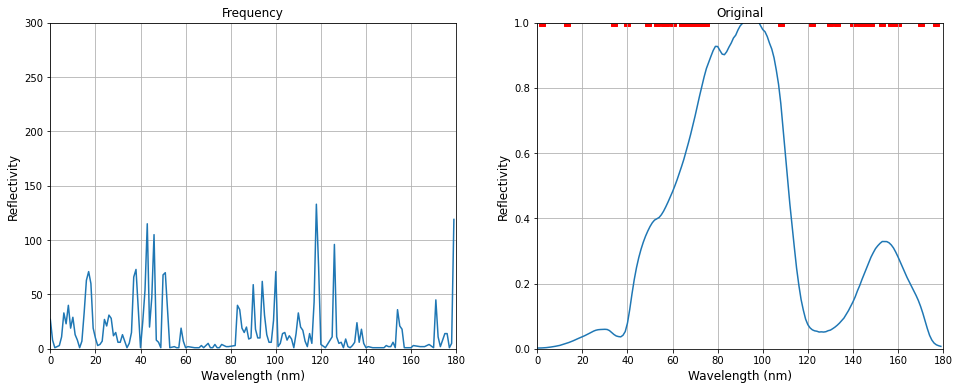

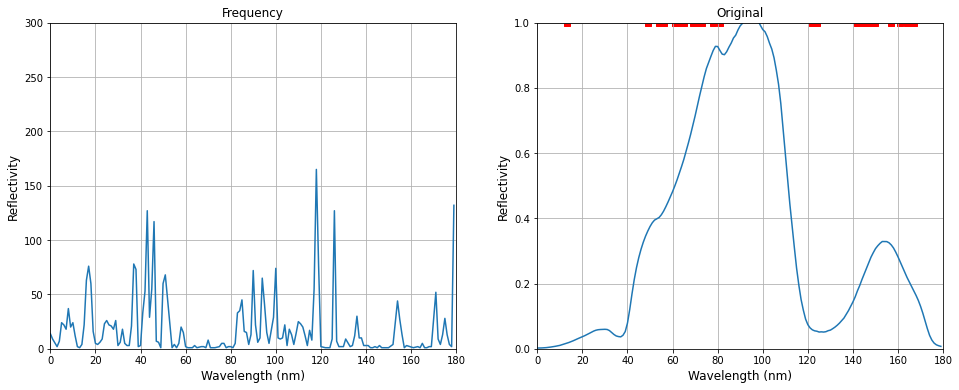

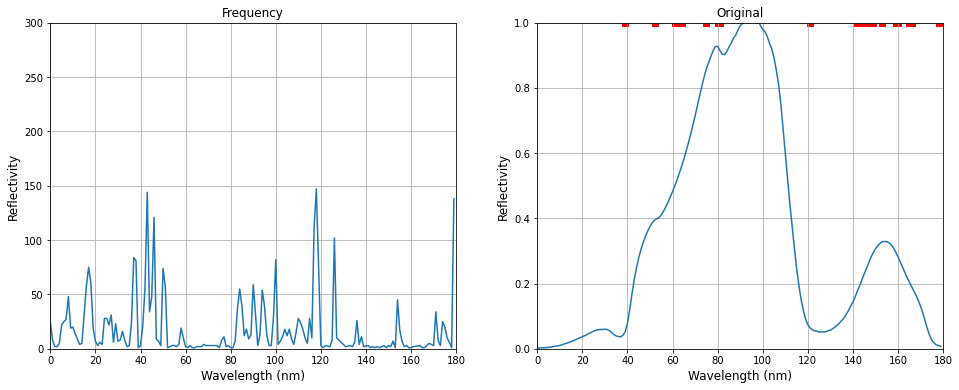

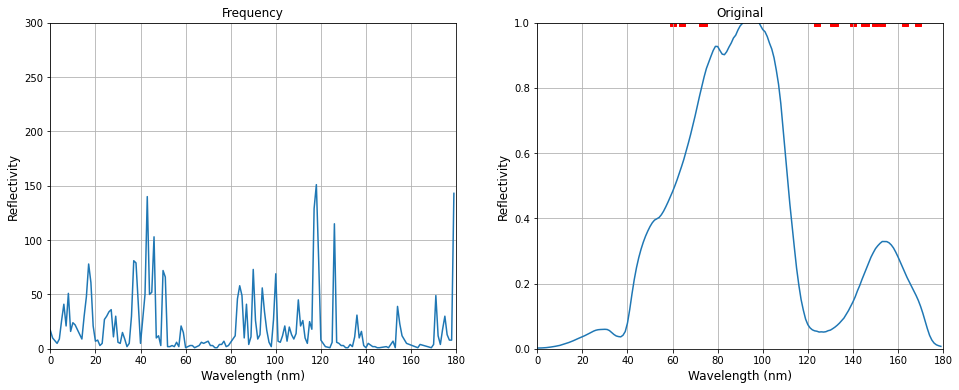

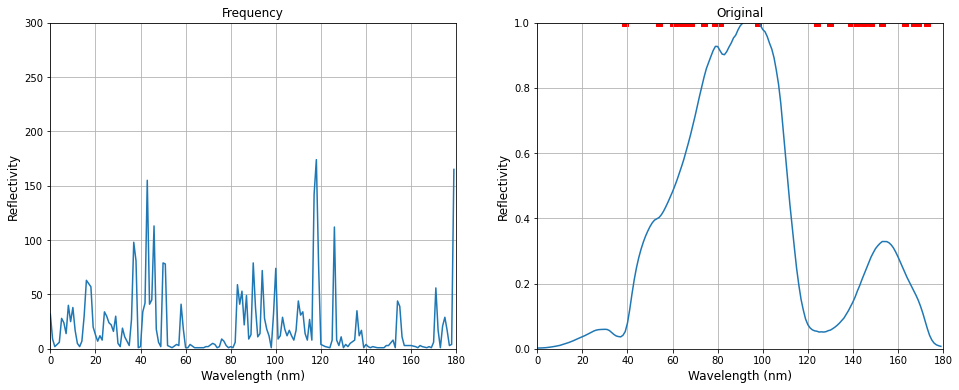

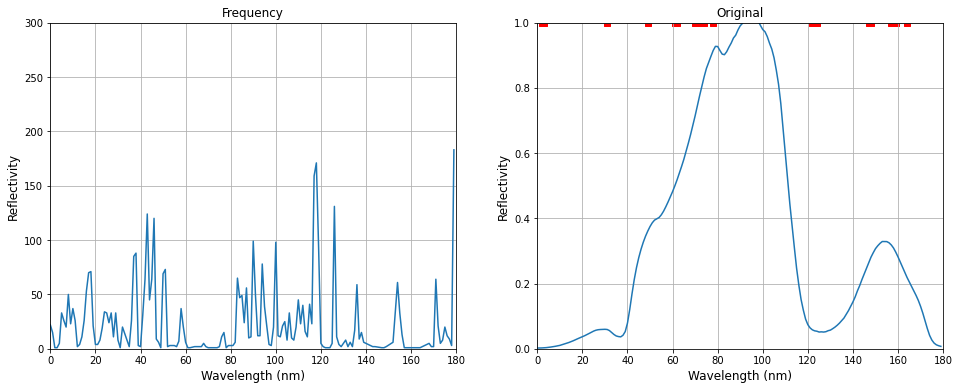

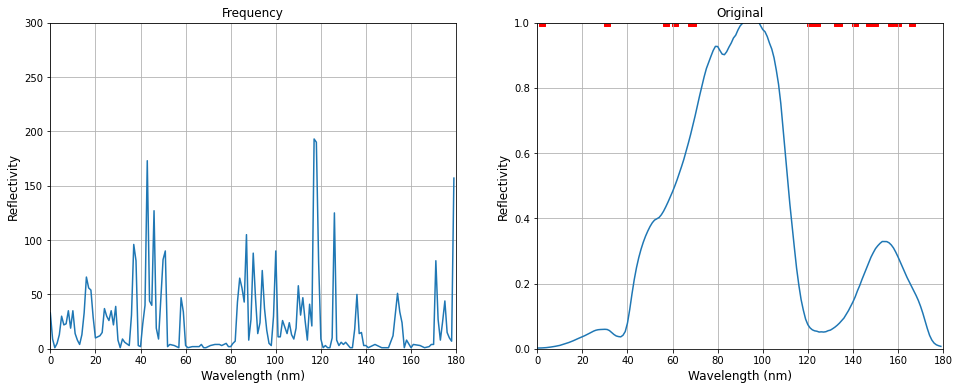

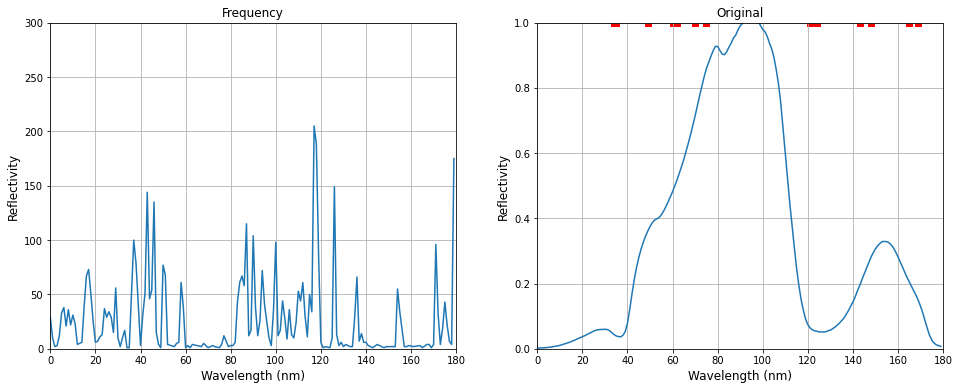

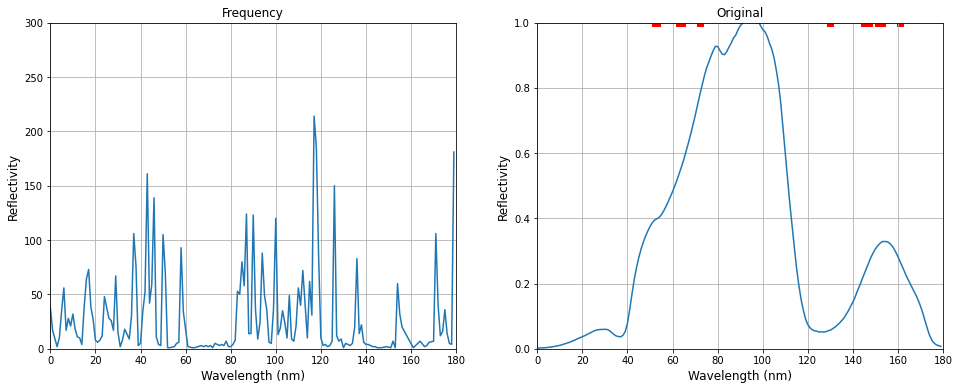

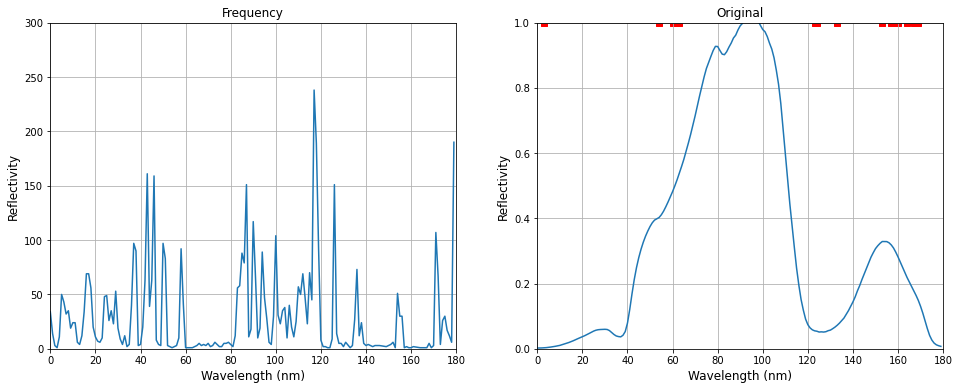

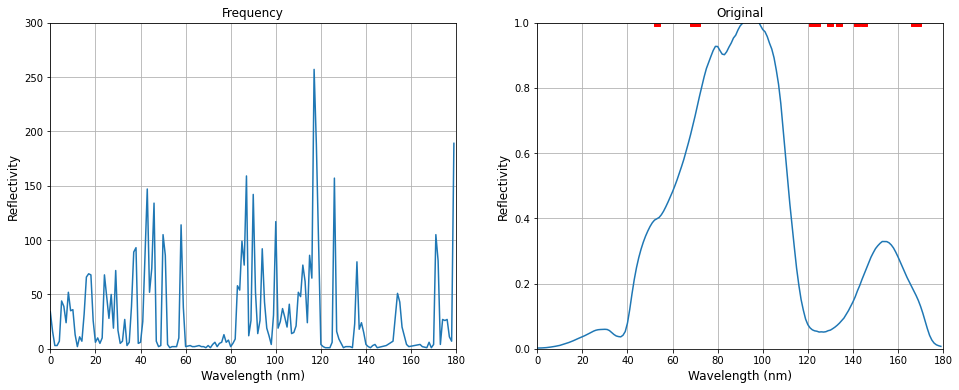

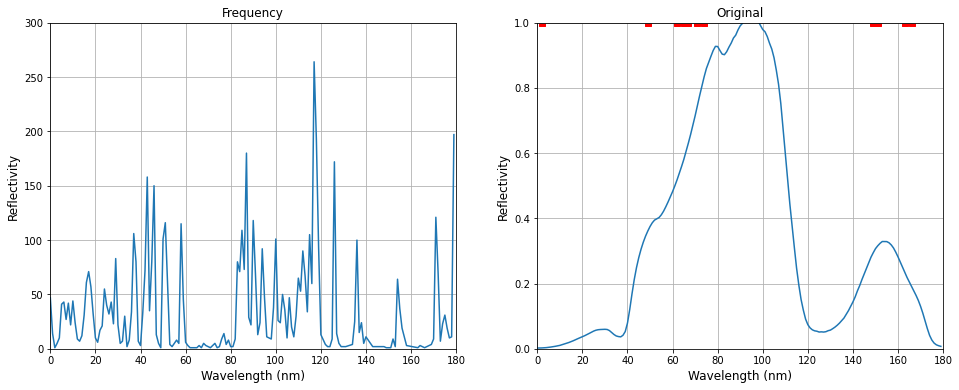

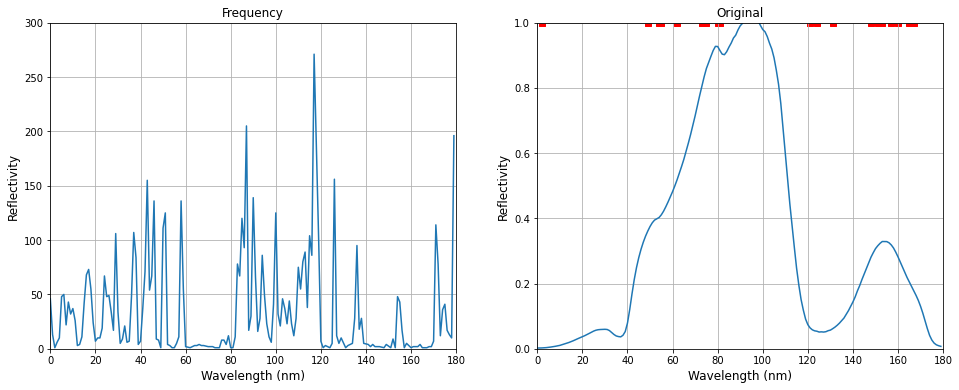

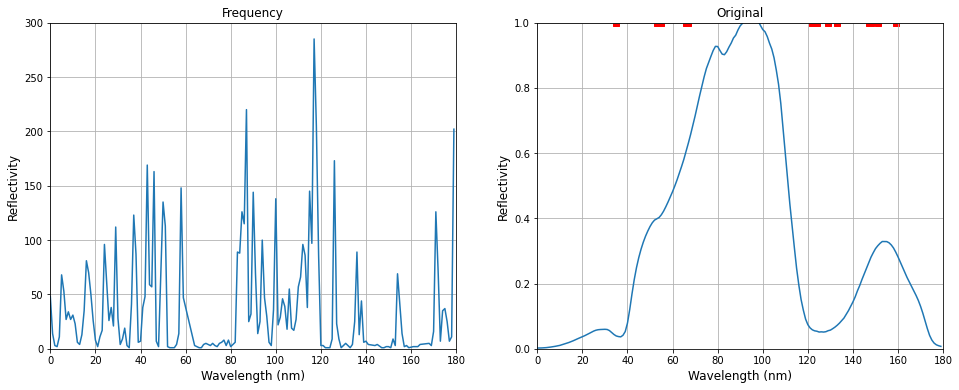

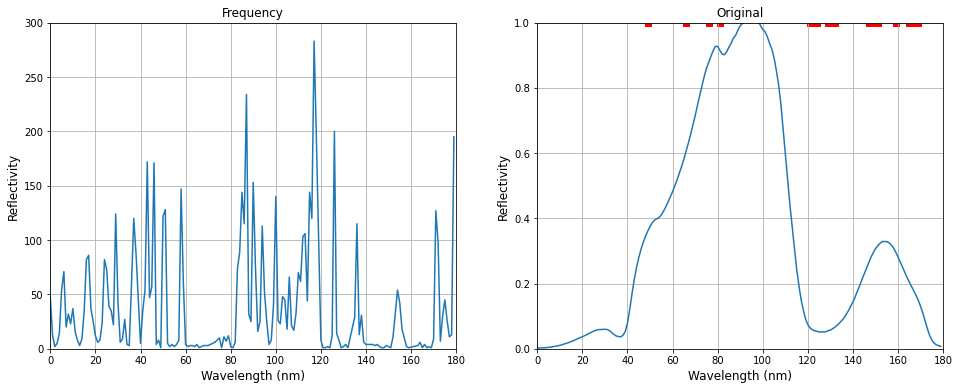

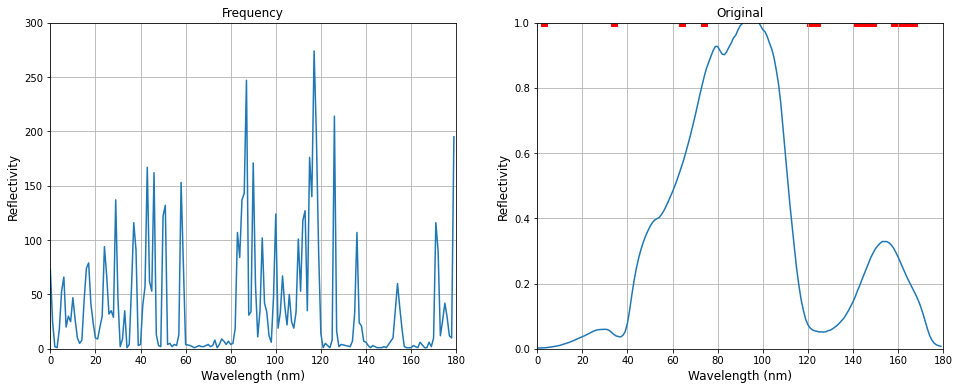

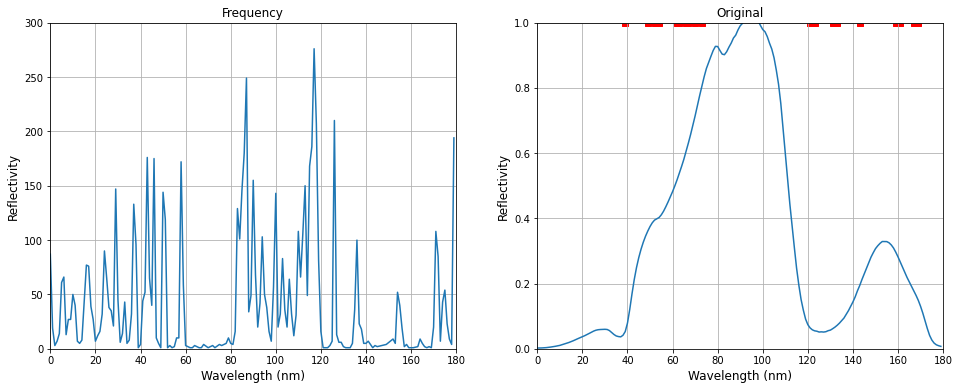

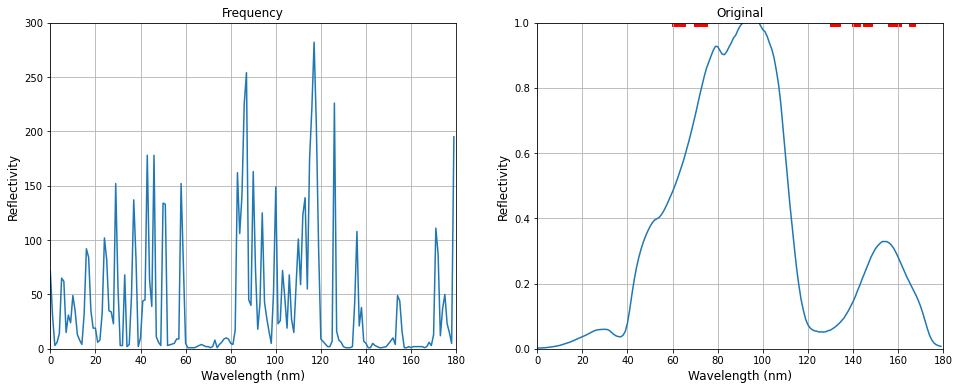

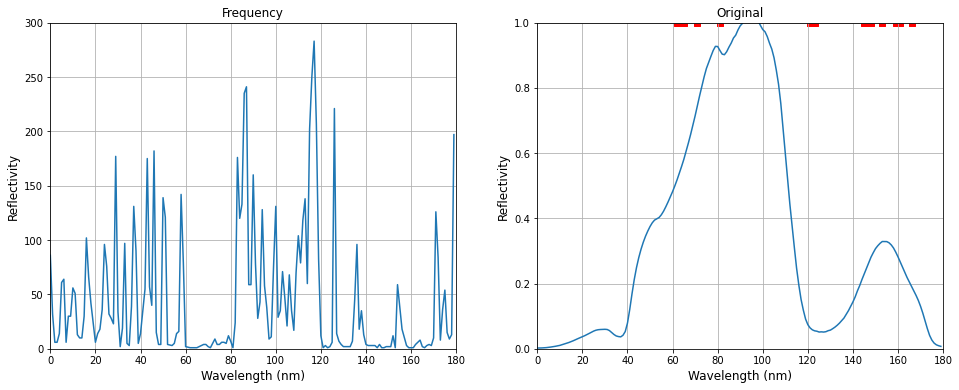

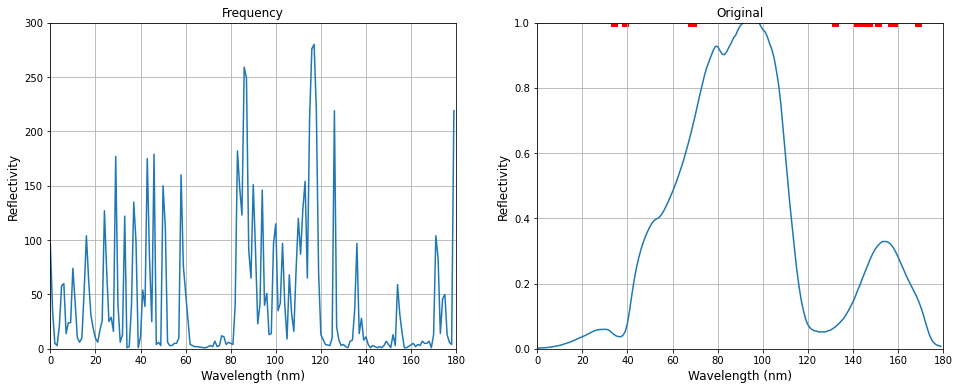

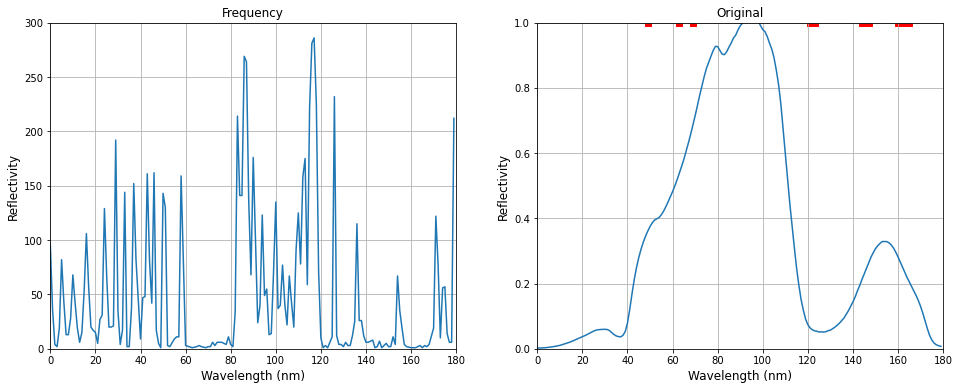

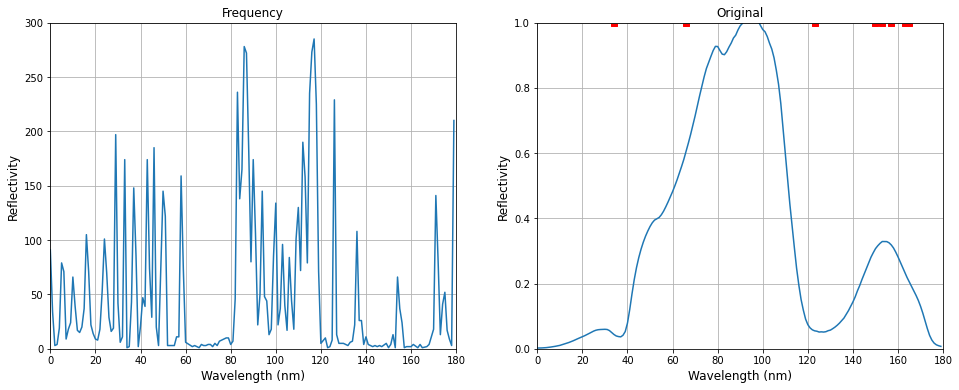

In [14]:
from My_feature_selection import SPA
from collections import Counter
for j in range(2,30):
    result_all = []
    #运行500次
    for i in range(0,300):
        X_train1, X_test1, y_train1, y_test = train_test_split(X1, Y, test_size = 1/3, random_state = None)
        ####2.3SPA####
        spa_var_sel, spa_var_sel2, RMSEP_scree,XX = SPA().spa(X_train1, y_train1, m_min= j, m_max= 50, Xval = X_test1, yval = y_test, autoscaling=1)
        result_all = np.hstack((result_all, spa_var_sel)) 

    #计算次数    
    c,s = np.unique(result_all,return_counts=True)  
    Counter(result_all)
    print(j)
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    fonts = 12
    plt.plot(c, s, linewidth=1.5)
    plt.xlim(0, 180)
    plt.ylim(0, 300)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Frequency', fontsize=fonts)
    plt.grid(True)


    #var_selqwe = [11,16,113,53,126,69,49,118,137,83,129]
    plt.subplot(122)
    plt.plot(xx, X1[0, :], linewidth=1.5)
    plt.scatter(c, s, marker='s', color='r')
    plt.xlim(0, 180)
    plt.ylim(0, 1)
    plt.xlabel('Wavelength (nm)', fontsize=fonts)
    plt.ylabel('Reflectivity', fontsize=fonts)
    plt.title('Original', fontsize=fonts)
    plt.grid(True)

    print(c)
    print(s)

(307, 104)
(307,)
0.9166530644965194


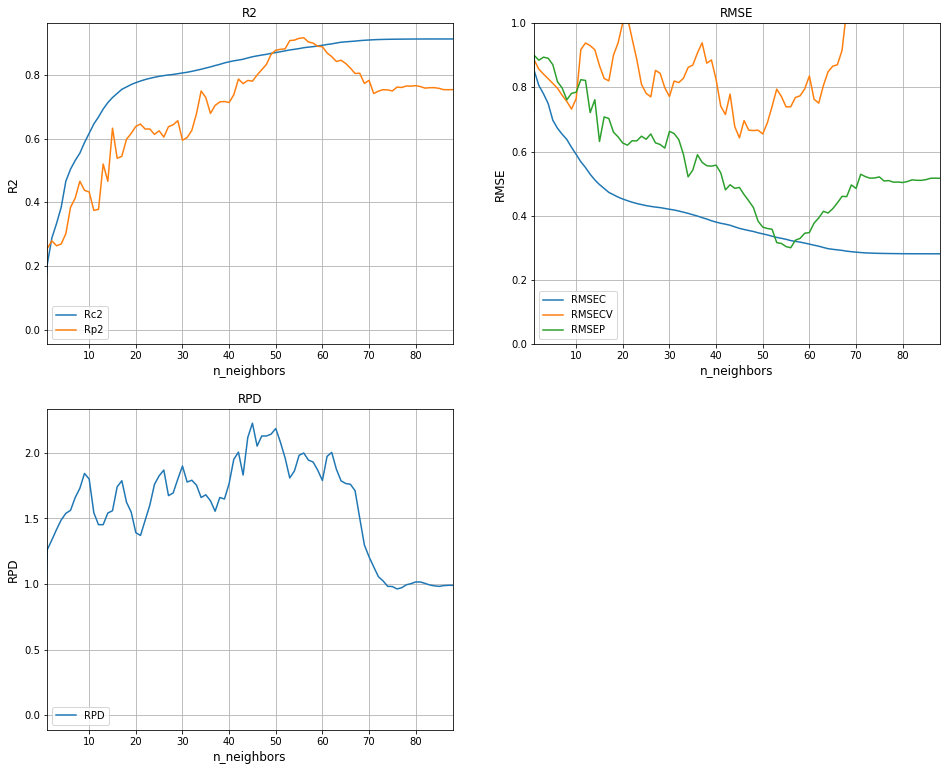

In [3]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing

###########4.回归##########
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from kernelpls import KernelPLS


my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12)
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/5_纹理特征/2_norlize_nlftf.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X10 = X2[:,0:57]  #光谱 78
X11 = X2[:,57:65]  #GLCM 8
X12 = X2[:,65:70]  #GGCM 5
X13 = X2[:,70:74]  #CDTM 4
X14 = X2[:,74:83]  #颜色矩 9
X15 = X2[:,83:94]  #外形参数 11
X16 = X2[:,94:102]  #GLCM 8
X17 = X2[:,102:107]  #GGCM 5
X18 = X2[:,107:111]  #CDTM 4
X19 = X2[:,111:120]  #颜色矩 
X20 = X2[:,120:125]  #NWSN

X21 = X2[:,125:134]  #NSSD
X22 = X2[:,134:143]  #非线性
X23 = X2[:,143:152]  #非线性
X24 = X2[:,152:161]  #非线性
X25 = X2[:,161:170]  #非线性
X26 = X2[:,170:179]  #非线性
X27 = X2[:,179:188]  #非线性
X28 = X2[:,188:197]  #非线性

X29 = X2[:,197:205]  #非线性
X30 = X2[:,205:213]  #非线性
X31 = X2[:,213:221]  #非线性
X32 = X2[:,221:229]  #非线性

X33 = X2[:,229:240]  #NGSF
X34 = X2[:,240:251]  #非线性
X35 = X2[:,251:262]  #非线性
X36 = X2[:,262:273]  #非线性

#X1 = np.hstack((X10,X14[:,[0,1,2,4]],X19[:,[0,1,2,7,8]],X20[:,[0,1,3,4]])) #光谱 78



X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],
                X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]],X20[:,[3,4]],
                X21[:,[1,7,8]],X22[:,[1]],X23[:,[2,6]],X25[:,[2]],X30[:,[6]],X31[:,[2]],X32[:,[5]],
                X33[:,[7,9]],X35[:,[2,9]],X36[:,[3,4]]))
#X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],
                #X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]],X20[:,[3,4]],
                #X21[:,[1,7,8]],X22[:,[1]],X23[:,[2,6]],X25[:,[2]],X30[:,[6]],X31[:,[2]],X32[:,[5]],
                #X33[:,[7,9]],X35[:,[2,9]],X36[:,[3,4]]))             
Y = X2[:,-1]

print(X1.shape)
print(Y.shape)

h = 90 #主改这个

r1 = np.zeros(h -2+1)
r2 = np.zeros(h -2+1)
r3 = np.zeros(h -2+1)

m1 = np.zeros(h -2+1)
m2 = np.zeros(h -2+1)
m3 = np.zeros(h -2+1)

s = np.zeros(h -2+1)

###########3.具体方法选择##########
###3.1回归####
for j in range(2,h):

    ###3.1 LinearRegression回归####
    model_LR = LinearRegression()
    
    ###3.2 DecisionTree回归####
    model_DT = tree.DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.001*j)  
    
    ###3.3SVR#### ‘linear’, ‘c’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    model_SVR = svm.SVR(kernel='linear',C=j, epsilon=0.02)    
    
    ###3.4 KNeighborsRegressor回归####
    model_KNeighbors = neighbors.KNeighborsRegressor(n_neighbors = j)
    
    ###3.5 PLSRegression回归####
    model_PLS = PLSRegression(n_components=j)
    
    ###3.6 RandomForestRegressor回归####
    model_RF = ensemble.RandomForestRegressor(n_estimators = j, min_samples_split=2,
min_samples_leaf=1,bootstrap=True, oob_score=False, n_jobs=-1) #这里使用

    ###3.7 GradientBoostingRegressor回归####
    model_GBM = GradientBoostingRegressor(n_estimators=j, learning_rate=0.1, random_state = None)

    ###3.8 AdaBoostRegressor####
    model_AB = ensemble.AdaBoostRegressor(n_estimators = j)

    ###3.9 Bagging####
    model_Bagging = BaggingRegressor(n_estimators = j)

    ###3.10 ExtraTreeRegressor####   
    model_ExtraTree = ExtraTreeRegressor(max_depth=j)

    ###3.11 Stacking回归####
    svr_rbf = SVR(kernel='linear')
    model_S = StackingRegressor(regressors=[model_PLS, model_SVR, model_AB],meta_regressor=svr_rbf)

    ###3.12 MLP回归####
    model_MLP =  MLPRegressor(solver='adam',alpha=1e-3*j,
        hidden_layer_sizes=(100,200,100, 50), activation='relu',max_iter=2000, random_state=1)
    
    ###3.13 KPLS回归####
    model_KPLS =  KernelPLS(copy=True, max_iter=500,nkernel_components = 100, scale=True, tol=1e-06,
                            kernel = 'laplacian',  preprocess = True, gamma =None, coef0 = j,degree = 3)
    
    ###3.14 KRR回归####
    model_KRR = KernelRidge(alpha=0.6,  kernel='poly', degree=3, coef0=j)
    
    model = model_PLS

    
    # 使用 train_test_split 将数据集分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 1/5, random_state = 0)

    # 使用 cross_validate 进行训练和评估
    scoring = ['r2', 'neg_mean_squared_error']
    scores2 = cross_validate(model, X_train, y_train,scoring = scoring,cv = 5,return_train_score=True, return_estimator=True)

    
    # 提取各项评估指标的结果
    train_score = scores2['train_r2'].mean()
    train_mse = scores2['train_neg_mean_squared_error'].mean()
    
    val_score = scores2['test_r2'].mean()
    val_mse = scores2['test_neg_mean_squared_error'].mean()
    
    # 获取交叉验证模型中的最佳模型
    best_model_idx = np.argmax(scores2['test_r2'])
    best_model = scores2['estimator'][best_model_idx]
    predicted = best_model.predict(X_test)
    
    test_score = metrics.r2_score(y_test,predicted)
    test_mse = metrics.mean_squared_error(y_test, predicted)

    SD = np.std(y_test-predicted)
    RPD = SD/np.sqrt(-val_mse)
    

    r1[j-1] = train_score
    r2[j-1] = val_score
    r3[j-1] = test_score

    m1[j-1] = np.sqrt(-train_mse)
    m2[j-1] = np.sqrt(-val_mse)
    m3[j-1] = np.sqrt(test_mse)
    
    s[j-1] = RPD
    
    

xx = np.arange(0, h -2+1)
    
plt.figure(figsize=(16, 13))
plt.subplot(221)
fonts = 12
p1, = plt.plot(xx, r1, linewidth=1.5)
#p2, = plt.plot(xx, r2, linewidth=1.5)
p3, = plt.plot(xx, r3, linewidth=1.5)
plt.xlim(1, h -2)

plt.xlabel('n_neighbors', fontsize=fonts)
plt.ylabel('R2', fontsize=fonts)
plt.title('R2', fontsize=fonts)
plt.grid(True)   
l1 = plt.legend([p1,p3], ['Rc2','Rp2'], loc='lower left')

max_value = max(r3)
print(max_value) 

plt.subplot(222)
p4, = plt.plot(xx, m1, linewidth=1.5)
p5, = plt.plot(xx, m2, linewidth=1.5)
p6, = plt.plot(xx, m3, linewidth=1.5)
plt.xlim(1, h -2)
plt.ylim(0, 1)
plt.xlabel('n_neighbors', fontsize=fonts)
plt.ylabel('RMSE', fontsize=fonts)
plt.title('RMSE', fontsize=fonts)
plt.grid(True)   
l1 = plt.legend([p4,p5,p6], ['RMSEC','RMSECV','RMSEP'], loc='lower left')


plt.subplot(223)
p7, = plt.plot(xx, s, linewidth=1.5)
plt.xlim(1, h -2)
#plt.ylim(-5, 3.5)
plt.xlabel('n_neighbors', fontsize=fonts)
plt.ylabel('RPD', fontsize=fonts)
plt.title('RPD', fontsize=fonts)
plt.grid(True)
l1 = plt.legend([p7], ['RPD'], loc='lower left')

In [10]:
k = 42
print('%.4f' % r1[k]) 
print('%.4f' % m1[k]) 
print('%.4f' % r3[k]) 
print('%.4f' % m3[k]) 
print('%.4f' % s[k])

0.8465
0.3740
0.7869
0.4809
2.0060


In [81]:
k =56
print('%.4f' % r1[k]) 
print('%.4f' % m1[k]) 
print('%.4f' % r3[k]) 
print('%.4f' % m3[k]) 
print('%.4f' % r2[k]) 
print('%.4f' % m2[k]) 
print('%.4f' % s[k])

0.8853
0.3230
0.9167
0.3008
0.3600
0.7396
1.9994


(302, 69)
(302,)
0.8541501499137489


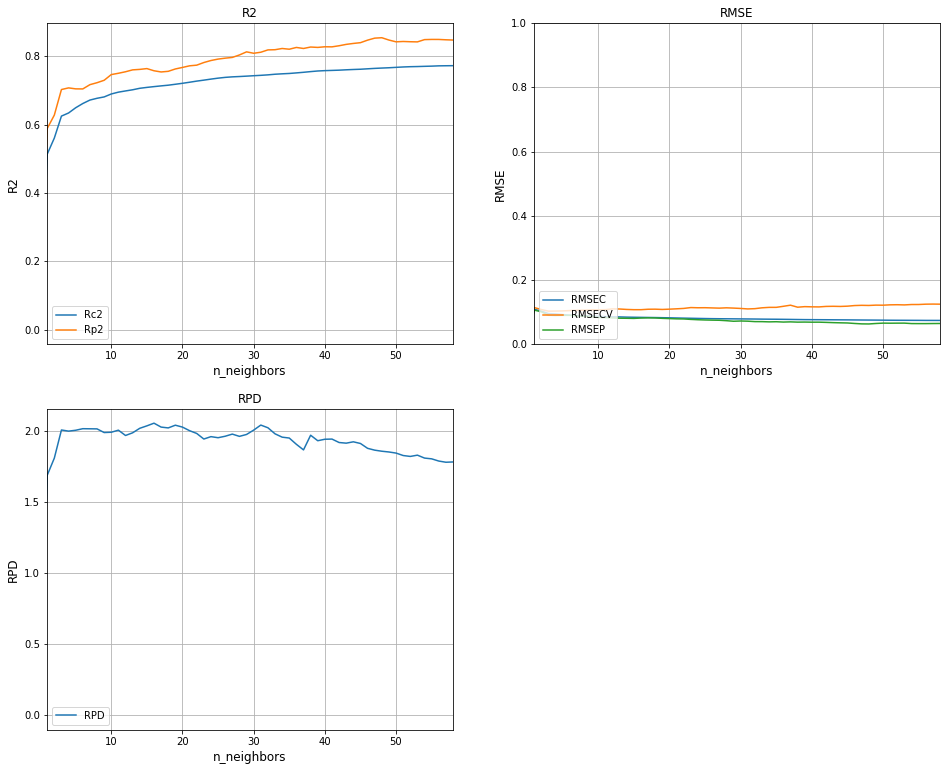

In [183]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing

###########4.回归##########
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from kernelpls import KernelPLS


my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12)
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/5_纹理特征/5_norlize_nlftf.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
#X10 = X2[:,0:57]  #光谱 78
#X11 = X2[:,57:65]  #GLCM 8
#X12 = X2[:,65:70]  #GGCM 5
#X13 = X2[:,70:74]  #CDTM 4
#X14 = X2[:,74:83]  #颜色矩 9
#X15 = X2[:,83:94]  #外形参数 11

#X16 = X2[:,94:102]  #GLCM 8
#X17 = X2[:,102:107]  #GGCM 5
#X18 = X2[:,107:111]  #CDTM 4
#X19 = X2[:,111:120]  #颜色矩 
#X20 = X2[:,120:125]  #颜色矩 
#X1 = np.hstack((X10,X14[:,[0,1,2,4]],X19[:,[0,1,2,7,8]],X20[:,[0,1,3,4]])) #光谱 78
#X1 = np.hstack((X10,X20[:,[3,4]])) #光谱 78
#X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]],X20[:,[3,4]])) #光谱 78,X20[:,[3,4]]

#X1 = X10[:,0:52] #光谱 78




X10 = X2[:,0:42]  #光谱 78
X11 = X2[:,42:50]  #GLCM 8
X12 = X2[:,50:55]  #GGCM 5
X13 = X2[:,55:59]  #CDTM 4
X14 = X2[:,59:68]  #颜色矩 9
X15 = X2[:,68:79]  #外形参数 11
X16 = X2[:,79:87]  #GLCM 8
X17 = X2[:,87:92]  #GGCM 5
X18 = X2[:,92:96]  #CDTM 4
X19 = X2[:,96:105]  #颜色矩 9
X20 = X2[:,105:110]  #NWSF

X21 = X2[:,110:119]  #NSSD
X22 = X2[:,119:128]  #颜色矩 9
X23 = X2[:,128:137]  #颜色矩 9
X24 = X2[:,137:146]  #颜色矩 9
X25 = X2[:,146:155]  #颜色矩 9
X26 = X2[:,155:164]  #颜色矩 9
X27 = X2[:,164:173]  #颜色矩 9
X28 = X2[:,173:182]  #颜色矩 9

X29 = X2[:,182:190]  #非线性
X30 = X2[:,190:198]  #非线性
X31 = X2[:,198:206]  #非线性
X32 = X2[:,206:214]  #非线性

X33 = X2[:,214:225]  #NGSF
X34 = X2[:,225:236]  #非线性
X35 = X2[:,236:247]  #非线性
X36 = X2[:,247:258]  #非线性

#X1 = np.hstack((X10,X14[:,[3,4,7]],X19[:,[0,2,5,7,8]]))

#X1 = np.hstack((X10,X11[:,[4]],X12[:,[3,4]],X13[:,[3]],X14[:,[1,4,7]],X15[:,[0,2,4]],X16[:,[0,1,2,4,5,7]],X17[:,[2]],
                #X18[:,[0,1,2]],X19[:,[1]],
                #X25[:,[8]],X27[:,[1,3,5]],X28[:,[1,8]],
                #X33[:,[3,6]],X34[:,[5]],X35[:,[1,3]]))
X1 = np.hstack((X10,X11[:,[4]],X12[:,[3,4]],X13[:,[3]],X14[:,[1,4,7]],X15[:,[0,2,4]],X16[:,[0,1,2,4,5,7]],X17[:,[2]],
                X18[:,[0,1,2]],X19[:,[1]],X20[:,[2]],
                X33[:,[3,6]],X34[:,[5]],X35[:,[1,3]]))
    
#X1 = np.hstack((X10,X14[:,[1,4,7]],X19[:,[1,6]],X20[:,[0,1,2,3,4]]))

#X1 = X2[:,0:42]
Y = X2[:,-1]

print(X1.shape)
print(Y.shape)

h = 60 #主改这个

r1 = np.zeros(h -2+1)
r2 = np.zeros(h -2+1)
r3 = np.zeros(h -2+1)

m1 = np.zeros(h -2+1)
m2 = np.zeros(h -2+1)
m3 = np.zeros(h -2+1)

s = np.zeros(h -2+1)

###########3.具体方法选择##########
###3.1回归####
for j in range(2,h):

    ###3.1 LinearRegression回归####
    model_LR = LinearRegression()
    
    ###3.2 DecisionTree回归####
    model_DT = tree.DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.001*j)  
    
    ###3.3SVR#### ‘linear’, ‘c’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    model_SVR = svm.SVR(kernel='linear',C=j, epsilon=0.02)    
    
    ###3.4 KNeighborsRegressor回归####
    model_KNeighbors = neighbors.KNeighborsRegressor(n_neighbors = j)
    
    ###3.5 PLSRegression回归####
    model_PLS = PLSRegression(n_components=j)
    
    ###3.6 RandomForestRegressor回归####
    model_RF = ensemble.RandomForestRegressor(n_estimators = j, min_samples_split=2,
min_samples_leaf=1,bootstrap=True, oob_score=False, n_jobs=-1) #这里使用

    ###3.7 GradientBoostingRegressor回归####
    model_GBM = GradientBoostingRegressor(n_estimators=j, learning_rate=0.1, random_state = None)

    ###3.8 AdaBoostRegressor####
    model_AB = ensemble.AdaBoostRegressor(n_estimators = j)

    ###3.9 Bagging####
    model_Bagging = BaggingRegressor(n_estimators = j)

    ###3.10 ExtraTreeRegressor####   
    model_ExtraTree = ExtraTreeRegressor(max_depth=j)

    ###3.11 Stacking回归####
    svr_rbf = SVR(kernel='linear')
    model_S = StackingRegressor(regressors=[model_PLS, model_SVR, model_AB],meta_regressor=svr_rbf)

    ###3.12 MLP回归####
    model_MLP =  MLPRegressor(solver='adam',alpha=1e-3*j,
        hidden_layer_sizes=(100,200,100, 50), activation='relu',max_iter=2000, random_state=1)
    
    ###3.13 KPLS回归####
    model_KPLS =  KernelPLS(copy=True, max_iter=500,nkernel_components = 100, scale=True, tol=1e-06,
                            kernel = 'laplacian',  preprocess = True, gamma =None, coef0 = j,degree = 3)
    
    ###3.14 KRR回归####
    model_KRR = KernelRidge(alpha=0.6,  kernel='poly', degree=3, coef0=j)
    
    model = model_PLS

    
    # 使用 train_test_split 将数据集分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 1/5, random_state = 0)

    # 使用 cross_validate 进行训练和评估
    scoring = ['r2', 'neg_mean_squared_error']
    scores2 = cross_validate(model, X_train, y_train,scoring = scoring,cv = 5,return_train_score=True, return_estimator=True)

    
    # 提取各项评估指标的结果
    train_score = scores2['train_r2'].mean()
    train_mse = scores2['train_neg_mean_squared_error'].mean()
    
    val_score = scores2['test_r2'].mean()
    val_mse = scores2['test_neg_mean_squared_error'].mean()
    
    # 获取交叉验证模型中的最佳模型
    best_model_idx = np.argmax(scores2['test_r2'])
    best_model = scores2['estimator'][best_model_idx]
    predicted = best_model.predict(X_test)
    
    test_score = metrics.r2_score(y_test,predicted)
    test_mse = metrics.mean_squared_error(y_test, predicted)

    SD = np.std(y_test-predicted)
    RPD = SD/np.sqrt(-val_mse)
    

    r1[j-1] = train_score
    r2[j-1] = val_score
    r3[j-1] = test_score

    m1[j-1] = np.sqrt(-train_mse)
    m2[j-1] = np.sqrt(-val_mse)
    m3[j-1] = np.sqrt(test_mse)
    
    s[j-1] = RPD
    
    

xx = np.arange(0, h -2+1)
    
plt.figure(figsize=(16, 13))
plt.subplot(221)
fonts = 12
p1, = plt.plot(xx, r1, linewidth=1.5)
#p2, = plt.plot(xx, r2, linewidth=1.5)
p3, = plt.plot(xx, r3, linewidth=1.5)
plt.xlim(1, h -2)

plt.xlabel('n_neighbors', fontsize=fonts)
plt.ylabel('R2', fontsize=fonts)
plt.title('R2', fontsize=fonts)
plt.grid(True)   
l1 = plt.legend([p1,p3], ['Rc2','Rp2'], loc='lower left')

max_value = max(r3)
print(max_value) 

plt.subplot(222)
p4, = plt.plot(xx, m1, linewidth=1.5)
p5, = plt.plot(xx, m2, linewidth=1.5)
p6, = plt.plot(xx, m3, linewidth=1.5)
plt.xlim(1, h -2)
plt.ylim(0, 1)
plt.xlabel('n_neighbors', fontsize=fonts)
plt.ylabel('RMSE', fontsize=fonts)
plt.title('RMSE', fontsize=fonts)
plt.grid(True)   
l1 = plt.legend([p4,p5,p6], ['RMSEC','RMSECV','RMSEP'], loc='lower left')


plt.subplot(223)
p7, = plt.plot(xx, s, linewidth=1.5)
plt.xlim(1, h -2)
#plt.ylim(-5, 3.5)
plt.xlabel('n_neighbors', fontsize=fonts)
plt.ylabel('RPD', fontsize=fonts)
plt.title('RPD', fontsize=fonts)
plt.grid(True)
l1 = plt.legend([p7], ['RPD'], loc='lower left')

In [184]:
k = 48
print('%.4f' % r1[k]) 
print('%.4f' % m1[k]) 
print('%.4f' % r3[k]) 
print('%.4f' % m3[k])  
print('%.4f' % s[k])

0.7654
0.0756
0.8542
0.0634
1.8551


(302, 64)
(302,)
[0.57524181 0.16055335 0.52950871 0.32762107 0.03249789 0.17738534
 0.29316464 0.09609871 0.45593286 0.3456969  0.36007257 0.17412336
 0.67137084 0.09922128 0.08762174 0.59737409 0.48713322 0.29241263
 0.12307582 0.22336161 0.0772028  0.46339025 0.58371655 0.55317725
 0.14474182 0.19318032 0.44286072 0.33144695 0.21463361 0.38034823
 0.24993178 0.28201447 0.20591118 0.25723177 0.18512149 0.43383715
 0.59811875 0.19336786 0.38516413 0.0695401  0.18524041 0.2008596
 0.0956906  0.68226619 0.34328477 0.18244912 0.1542497  0.25541701
 0.10686833 0.44459668 0.29903731 0.14656209 0.32822783 0.19090678
 0.17408171 0.50957639 0.29024354 0.3597952  0.09427844 0.28153514
 0.11595122]
[[0.57284221]
 [0.23492143]
 [0.62862852]
 [0.36023221]
 [0.07683546]
 [0.20833109]
 [0.21471532]
 [0.19506868]
 [0.54925799]
 [0.36851953]
 [0.25267785]
 [0.19516082]
 [0.58453634]
 [0.10351772]
 [0.0878298 ]
 [0.46690275]
 [0.48802541]
 [0.46039401]
 [0.17599781]
 [0.16229481]
 [0.16092397]
 [0.470

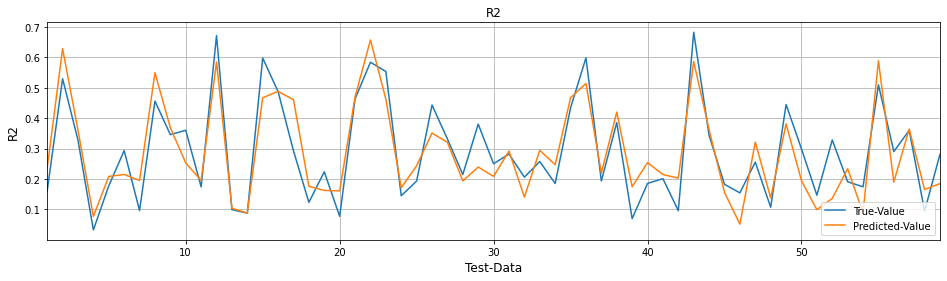

In [21]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing

###########4.回归##########
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from kernelpls import KernelPLS


my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12)
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/5_纹理特征/5_norlize.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
#X10 = X2[:,0:57]  #光谱 78
#X11 = X2[:,57:65]  #GLCM 8
#X12 = X2[:,65:70]  #GGCM 5
#X13 = X2[:,70:74]  #CDTM 4
#X14 = X2[:,74:83]  #颜色矩 9
#X15 = X2[:,83:94]  #外形参数 11

#X16 = X2[:,94:102]  #GLCM 8
#X17 = X2[:,102:107]  #GGCM 5
#X18 = X2[:,107:111]  #CDTM 4
#X19 = X2[:,111:120]  #颜色矩 9

#X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]])) #光谱 78
#X1 = np.hstack((X10,X14[:,[0,1,2,4]],X19[:,[0,1,2,7,8]])) #光谱 78
#X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]])) #光谱 78

#X1 = X10[:,0:52] #光谱 78


X10 = X2[:,0:42]  #光谱 78
X11 = X2[:,42:50]  #GLCM 8
X12 = X2[:,50:55]  #GGCM 5
X13 = X2[:,55:59]  #CDTM 4
X14 = X2[:,59:68]  #颜色矩 9
X15 = X2[:,68:79]  #外形参数 11

X16 = X2[:,79:87]  #GLCM 8
X17 = X2[:,87:92]  #GGCM 5
X18 = X2[:,92:96]  #CDTM 4
X19 = X2[:,96:105]  #颜色矩 9

#X1 = np.hstack((X10,X11[:,[4]],X12[:,[3,4]],X13[:,[3]],X16[:,[0,1,2,4,5,7]],X17[:,[2]],X18[:,[0,1,2]]))
#X1 = np.hstack((X10,X14[:,[3,4,7]],X19[:,[0,2,5,7,8]]))
#X1 = np.hstack((X10,X15[:,[0,2,4]]))
X1 = np.hstack((X10,X11[:,[4]],X12[:,[3,4]],X13[:,[3]],X15[:,[0,2,4]],X16[:,[0,1,2,4,5,7]],X17[:,[2]],X18[:,[0,1,2]],X19[:,[0,2,5,7,8]]))


#X1 = X2[:,0:42]
Y = X2[:,-1]

print(X1.shape)
print(Y.shape)

h = 61 #主改这个

r1 = np.zeros(h -2+1)
r2 = np.zeros(h -2+1)
r3 = np.zeros(h -2+1)

m1 = np.zeros(h -2+1)
m2 = np.zeros(h -2+1)
m3 = np.zeros(h -2+1)

s = np.zeros(h -2+1)

###########3.具体方法选择##########
###3.1回归####
j = 39

###3.1 LinearRegression回归####
model_LR = LinearRegression()

###3.2 DecisionTree回归####
model_DT = tree.DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.001*j)  

###3.3SVR#### ‘linear’, ‘c’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model_SVR = svm.SVR(kernel='linear',C=j, epsilon=0.02)    

###3.4 KNeighborsRegressor回归####
model_KNeighbors = neighbors.KNeighborsRegressor(n_neighbors = j)

###3.5 PLSRegression回归####
model_PLS = PLSRegression(n_components=j)

###3.6 RandomForestRegressor回归####
model_RF = ensemble.RandomForestRegressor(n_estimators = j, min_samples_split=2,
min_samples_leaf=1,bootstrap=True, oob_score=False, n_jobs=-1) #这里使用

###3.7 GradientBoostingRegressor回归####
model_GBM = GradientBoostingRegressor(n_estimators=j, learning_rate=0.1, random_state = None)

###3.8 AdaBoostRegressor####
model_AB = ensemble.AdaBoostRegressor(n_estimators = j)

###3.9 Bagging####
model_Bagging = BaggingRegressor(n_estimators = j)

###3.10 ExtraTreeRegressor####   
model_ExtraTree = ExtraTreeRegressor(max_depth=j)

###3.11 Stacking回归####
svr_rbf = SVR(kernel='linear')
model_S = StackingRegressor(regressors=[model_PLS, model_SVR, model_AB],meta_regressor=svr_rbf)

###3.12 MLP回归####
model_MLP =  MLPRegressor(solver='adam',alpha=1e-3*j,
    hidden_layer_sizes=(100,200,100, 50), activation='relu',max_iter=2000, random_state=1)

###3.13 KPLS回归####
model_KPLS =  KernelPLS(copy=True, max_iter=500,nkernel_components = 100, scale=True, tol=1e-06,
                        kernel = 'laplacian',  preprocess = True, gamma =None, coef0 = j,degree = 3)

###3.14 KRR回归####
model_KRR = KernelRidge(alpha=0.6,  kernel='poly', degree=3, coef0=j)

model = model_PLS


# 使用 train_test_split 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 1/5, random_state = 0)


# 使用 cross_validate 进行训练和评估
scoring = ['r2', 'neg_mean_squared_error']
scores2 = cross_validate(model, X_train, y_train,scoring = scoring,cv = 5,return_train_score=True, return_estimator=True)


# 提取各项评估指标的结果
train_score = scores2['train_r2'].mean()
train_mse = scores2['train_neg_mean_squared_error'].mean()

val_score = scores2['test_r2'].mean()
val_mse = scores2['test_neg_mean_squared_error'].mean()

# 获取交叉验证模型中的最佳模型
best_model_idx = np.argmax(scores2['test_r2'])
best_model = scores2['estimator'][best_model_idx]
predicted = best_model.predict(X_test)


xx = np.arange(0,h )
test_score = metrics.r2_score(y_test,predicted)
test_mse = metrics.mean_squared_error(y_test, predicted)

SD = np.std(y_test-predicted)
RPD = SD/np.sqrt(-val_mse)


r1 = train_score
r2 = val_score
r3 = test_score

m1 = np.sqrt(-train_mse)
m2 = np.sqrt(-val_mse)
m3 = np.sqrt(test_mse)

s = RPD
    
plt.figure(figsize=(16, 4))
fonts = 12
p1, = plt.plot(xx, y_test, linewidth=1.5)
p2, = plt.plot(xx, predicted, linewidth=1.5)
plt.xlim(1, h -2)

plt.xlabel('Test-Data', fontsize=fonts)
plt.ylabel('R2', fontsize=fonts)
plt.title('R2', fontsize=fonts)
plt.grid(True)   
l1 = plt.legend([p1,p2], ['True-Value','Predicted-Value'], loc='lower right')

print(y_test)
print(predicted)

In [666]:
print(y_test.shape[0])
ert = np.array(y_test)
print(ert.shape)
for i in ert:
    print(i,end=',')

61
(61,)
0.575241810810811,0.160553353808354,0.529508707403055,0.327621068796069,0.0324978918918919,0.177385337837838,0.29316463963964,0.096098712998713,0.45593285546416,0.345696904176904,0.360072574002574,0.174123360752056,0.671370835380835,0.0992212776412776,0.0876217432432432,0.597374090909091,0.487133217503218,0.292412628992629,0.123075817923186,0.223361608751609,0.0772027962577963,0.463390247747748,0.583716547911548,0.553177245817246,0.144741824324324,0.193180319410319,0.442860724815725,0.331446945945946,0.214633607520564,0.380348230958231,0.249931776061776,0.282014472972973,0.205911179361179,0.257231769041769,0.185121486486486,0.433837148648649,0.598118746928747,0.193367862407862,0.385164132882883,0.0695401029601029,0.185240410810811,0.200859601029601,0.0956905968468469,0.682266190476191,0.34328477027027,0.182449118683901,0.154249702702703,0.255417014742015,0.106868331374853,0.44459667953668,0.29903730958231,0.146562094594595,0.328227825552826,0.190906780258519,0.174081706970128,

In [667]:
print(predicted.shape[0])
ert2 = np.array(predicted)
print(ert2.shape)
for i in ert2:
    print(*i,end=',')

61
(61, 1)
0.5262915396690007,0.23209845760337328,0.6125963834413932,0.3305798374835161,0.06483686550727313,0.20498402761497708,0.20553948935178123,0.16529425861153318,0.5629315284740384,0.3674171604366268,0.27222453635749094,0.1726564844070012,0.5655045314256286,0.15461233901295662,0.11991855454151962,0.4588802985347065,0.48372575369603205,0.4424055667021943,0.16172086210262876,0.14999238724107938,0.13491120294179654,0.43680525205267934,0.6533375386734346,0.4587180391647246,0.12929952294182273,0.2666573841248982,0.350641932052376,0.3128768874493471,0.19555625143644295,0.29690096075074784,0.2150731713571984,0.3053297440905323,0.14380696775962237,0.2904442561483887,0.22864953809640537,0.4515742172638018,0.5112663061184191,0.22020893893299825,0.39076997740337044,0.13991191613196702,0.25274651267031173,0.19030966503497254,0.19771993055562126,0.5820739921304336,0.3581943857035224,0.15823024027184968,0.06813503239849666,0.3332276414549021,0.12701267647166453,0.39798349432628305,0.2133963817

In [668]:
print('%.4f' % r1) 
print('%.4f' % m1) 
print('%.4f' % r3) 
print('%.4f' % m3) 
print('%.4f' % r2) 
print('%.4f' % m2) 
print('%.4f' % s)

0.7527
0.0776
0.8400
0.0665
0.5071
0.1055
2.1406


(307, 74)
(307,)
[18.5 17.2 18.1 18.  20.3 17.2 19.3 18.2 17.8 17.3 17.4 17.1 16.6 18.6
 18.8 18.3 16.9 18.9 18.4 18.4 18.3 18.6 16.4 20.  17.4 19.  17.9 18.2
 18.7 18.  18.8 18.  17.3 18.6 18.  17.3 19.2 16.5 17.7 16.6 17.5 18.4
 17.7 17.9 17.2 19.3 17.2 18.3 18.7 18.9 18.  17.1 17.3 18.2 18.9 17.2
 19.  19.2 18.7 17.4 18.1 16.4 16.8 17.1 18.2 19.  17.7 16.9 19.5 18.1
 18.  18.2 18.5 18.7 17.9 18.2 17.3 17.  17.5 18.8 19.8 18.6 17.8 18.8
 16.8 17.4 18.1 17.5 20.2 18.  17.7 18.7 17.8 19.5 18.6 18.8 18.  16.7
 19.4 16.6 15.4 17.9 18.2 16.6 17.7 19.2 17.  18.3 17.7 17.4 17.4 19.6
 20.  17.1 19.4 17.2 18.6 18.  17.8 18.1 18.6 19.8 16.7 15.7 17.  16.9
 19.2 17.5 17.  18.1 18.  18.1 19.2 18.5 16.5 16.6 19.  17.3 17.  17.7
 17.6 17.9 17.4 18.4 18.1 17.2 18.5 17.2 17.8 19.5 18.5 17.9 17.5 17.
 18.7 18.1 18.2 17.8 17.5 18.9 17.5 16.5 18.9 18.9 17.1 19.  16.7 16.5
 16.  17.5 17.6 16.9 16.5 17.5 17.5 17.8 18.9 18.3 16.  19.1 19.  17.
 20.3 16.  18.2 16.9 17.7 18.5 18.8 19.7 17.  18.1 17.6 17.6 1

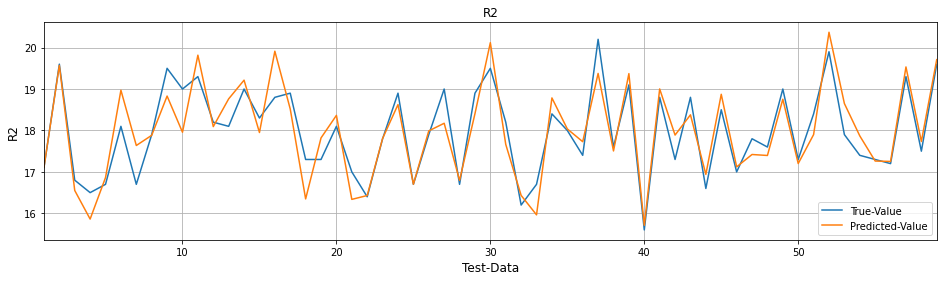

In [7]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing

###########4.回归##########
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from kernelpls import KernelPLS


my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12)
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/5_纹理特征/2_norlize.xlsx'

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X10 = X2[:,0:57]  #光谱 78
X11 = X2[:,57:65]  #GLCM 8
X12 = X2[:,65:70]  #GGCM 5
X13 = X2[:,70:74]  #CDTM 4
X14 = X2[:,74:83]  #颜色矩 9
X15 = X2[:,83:94]  #外形参数 11

X16 = X2[:,94:102]  #GLCM 8
X17 = X2[:,102:107]  #GGCM 5
X18 = X2[:,107:111]  #CDTM 4
X19 = X2[:,111:120]  #颜色矩 9

X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]])) #光谱 78
#X1 = np.hstack((X10,X14[:,[0,1,2,4]],X19[:,[0,1,2,7,8]])) #光谱 78
#X1 = np.hstack((X10,X11[:,[0,2,3]],X12[:,[0]],X13[:,[0,3]],X14[:,[0,1,2,4]],X15[:,[0,1,3,4,5,7,8,10]],X16[:,[4]],X17[:,[0,1]],X18[:,[1,2,3]],X19[:,[0,1,2,7,8]])) #光谱 78

#X1 = X10[:,0:52] #光谱 78


#X10 = X2[:,0:42]  #光谱 78
#X11 = X2[:,42:50]  #GLCM 8
#X12 = X2[:,50:55]  #GGCM 5
#X13 = X2[:,55:59]  #CDTM 4
#X14 = X2[:,59:68]  #颜色矩 9
#X15 = X2[:,68:79]  #外形参数 11

#X16 = X2[:,79:87]  #GLCM 8
#X17 = X2[:,87:92]  #GGCM 5
#X18 = X2[:,92:96]  #CDTM 4
#X19 = X2[:,96:105]  #颜色矩 9

#X1 = np.hstack((X10,X11[:,[4]],X12[:,[3,4]],X13[:,[3]],X16[:,[0,1,2,4,5,7]],X17[:,[2]],X18[:,[0,1,2]]))
#X1 = np.hstack((X10,X14[:,[3,4,7]],X19[:,[0,2,5,7,8]]))
#X1 = np.hstack((X10,X15[:,[0,2,4]]))
X1 = np.hstack((X10,X11[:,[4]],X12[:,[3,4]],X13[:,[3]],X15[:,[0,2,4]],X16[:,[0,1,2,4,5,7]],X17[:,[2]],X18[:,[0,1,2]]))


#X1 = X2[:,0:42]
Y = X2[:,-1]

print(X1.shape)
print(Y.shape)

h = 61 #主改这个

r1 = np.zeros(h -2+1)
r2 = np.zeros(h -2+1)
r3 = np.zeros(h -2+1)

m1 = np.zeros(h -2+1)
m2 = np.zeros(h -2+1)
m3 = np.zeros(h -2+1)

s = np.zeros(h -2+1)

###########3.具体方法选择##########
###3.1回归####
j = 50

###3.1 LinearRegression回归####
model_LR = LinearRegression()

###3.2 DecisionTree回归####
model_DT = tree.DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.001*j)  

###3.3SVR#### ‘linear’, ‘c’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model_SVR = svm.SVR(kernel='linear',C=j, epsilon=0.02)    

###3.4 KNeighborsRegressor回归####
model_KNeighbors = neighbors.KNeighborsRegressor(n_neighbors = j)

###3.5 PLSRegression回归####
model_PLS = PLSRegression(n_components=j)

###3.6 RandomForestRegressor回归####
model_RF = ensemble.RandomForestRegressor(n_estimators = j, min_samples_split=2,
min_samples_leaf=1,bootstrap=True, oob_score=False, n_jobs=-1) #这里使用

###3.7 GradientBoostingRegressor回归####
model_GBM = GradientBoostingRegressor(n_estimators=j, learning_rate=0.1, random_state = None)

###3.8 AdaBoostRegressor####
model_AB = ensemble.AdaBoostRegressor(n_estimators = j)

###3.9 Bagging####
model_Bagging = BaggingRegressor(n_estimators = j)

###3.10 ExtraTreeRegressor####   
model_ExtraTree = ExtraTreeRegressor(max_depth=j)

###3.11 Stacking回归####
svr_rbf = SVR(kernel='linear')
model_S = StackingRegressor(regressors=[model_PLS, model_SVR, model_AB],meta_regressor=svr_rbf)

###3.12 MLP回归####
model_MLP =  MLPRegressor(solver='adam',alpha=1e-3*j,
    hidden_layer_sizes=(100,200,100, 50), activation='relu',max_iter=2000, random_state=1)

###3.13 KPLS回归####
model_KPLS =  KernelPLS(copy=True, max_iter=500,nkernel_components = 100, scale=True, tol=1e-06,
                        kernel = 'laplacian',  preprocess = True, gamma =None, coef0 = j,degree = 3)

###3.14 KRR回归####
model_KRR = KernelRidge(alpha=0.6,  kernel='poly', degree=3, coef0=j)

model = model_PLS


# 使用 train_test_split 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 1/5, random_state = 0)


# 使用 cross_validate 进行训练和评估
scoring = ['r2', 'neg_mean_squared_error']
scores2 = cross_validate(model, X_train, y_train,scoring = scoring,cv = 5,return_train_score=True, return_estimator=True)


# 提取各项评估指标的结果
train_score = scores2['train_r2'].mean()
train_mse = scores2['train_neg_mean_squared_error'].mean()

val_score = scores2['test_r2'].mean()
val_mse = scores2['test_neg_mean_squared_error'].mean()

# 获取交叉验证模型中的最佳模型
best_model_idx = np.argmax(scores2['test_r2'])
best_model = scores2['estimator'][best_model_idx]
predicted = best_model.predict(X_test)
predicted2 = best_model.predict(X_train)

xx = np.arange(0,h+1 )
test_score = metrics.r2_score(y_test,predicted)
test_mse = metrics.mean_squared_error(y_test, predicted)

SD = np.std(y_test-predicted)
RPD = SD/np.sqrt(-val_mse)


r1 = train_score
r2 = val_score
r3 = test_score

m1 = np.sqrt(-train_mse)
m2 = np.sqrt(-val_mse)
m3 = np.sqrt(test_mse)

s = RPD
    
plt.figure(figsize=(16, 4))
fonts = 12
p1, = plt.plot(xx, y_test, linewidth=1.5)
p2, = plt.plot(xx, predicted, linewidth=1.5)
plt.xlim(1, h -2)

plt.xlabel('Test-Data', fontsize=fonts)
plt.ylabel('R2', fontsize=fonts)
plt.title('R2', fontsize=fonts)
plt.grid(True)   
l1 = plt.legend([p1,p2], ['True-Value','Predicted-Value'], loc='lower right')

print(y_train)
print(predicted2)

In [8]:
print('%.4f' % r1) 
print('%.4f' % m1) 
print('%.4f' % r3) 
print('%.4f' % m3) 
print('%.4f' % r2) 
print('%.4f' % m2) 
print('%.4f' % s)

0.8886
0.3186
0.7942
0.4726
0.7178
0.4975
3.0537


In [673]:
print(y_train.shape[0])
ert = np.array(y_train)
print(ert.shape)
for i in ert:
    print(i,end=',')


241
(241,)
0.455874554054054,0.0673846718146718,0.315629348894349,0.361604963144963,0.452793548766157,0.29155528957529,0.474620963572268,0.135775614250614,0.148500958230958,0.109080302702703,0.206308329238329,0.182766692406692,0.145174828009828,0.421607690417691,0.230774876126126,0.375397516087516,0.656353054054054,0.166681597051597,0.415109877149877,0.257914094594595,0.31713731016731,0.317091081081081,0.191475096525097,0.38912414004914,0.124555027027027,0.27168545045045,0.383094658944659,0.642983024453025,0.144827321867322,0.409202272727273,0.153273143669986,0.143764945945946,0.270509498069498,0.270103837837838,0.134076695331695,0.304022068155112,0.370353772032902,0.233678574938575,0.360303719433719,0.41064286036036,0.395550245700246,0.286904932432432,0.0604936486486486,0.291498081081081,0.1834621386604,0.39088425997426,0.412175380835381,0.172682972972973,0.340904839124839,0.334270211515864,0.0672171202702703,0.290581326781327,0.476077179788484,0.175347186732187,0.265555368550369,0.20

In [674]:
print(predicted2.shape[0])
ert2 = np.array(predicted2)
print(ert2.shape)
for j in ert2:
    print(*j,end=',')

241
(241, 1)
0.36143950641817263,0.24331893712478087,0.3165811508465733,0.45290343269760874,0.4197612108758398,0.44859525721211463,0.41452042305287157,0.18008036785150022,0.17481510938015582,0.16213634371523394,0.18968716785387546,0.18933020690466545,0.21600714477075883,0.3591000226807007,0.3126351023663992,0.34011645373466864,0.5164763389644174,0.21198910898250972,0.5022850370596532,0.2551743969408818,0.3078283111015608,0.3838950144000211,0.32465799999287676,0.36794629248060723,0.16059953001933086,0.4412034476487539,0.3638896196925417,0.35953426724529297,0.2522312650513557,0.36569652847186124,0.16130834907190167,0.17624832904440596,0.3341438146044374,0.2172479692479699,0.19878599416011694,0.2198514845689919,0.35631104377224126,0.13965036645695156,0.3547783602875095,0.3788232696856731,0.35819602279216195,0.3252008276323562,0.11169621714849326,0.2680873926177099,0.27230744177692184,0.40179624543903475,0.3416959873168746,0.16079784010643344,0.3123374731948508,0.32315670457681206,0.367125

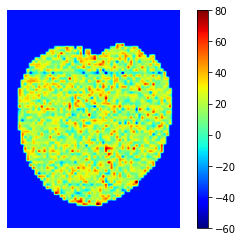

1


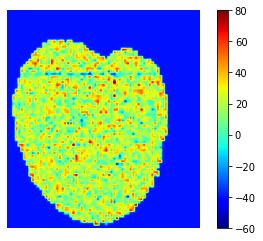

2


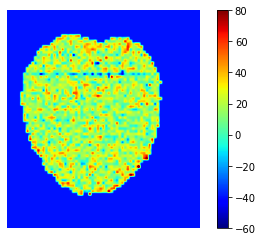

3


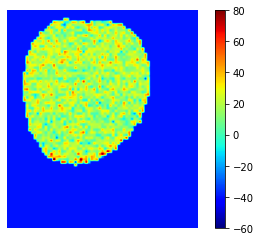

4


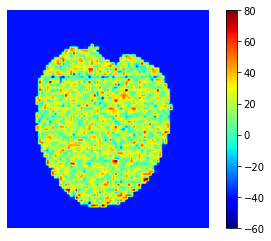

5


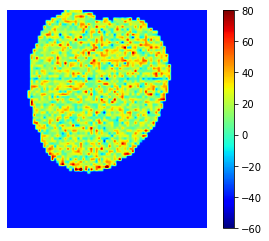

6


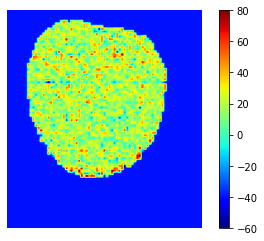

7


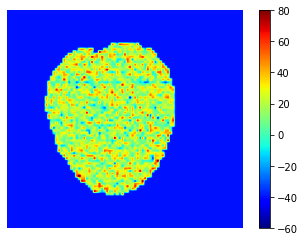

8


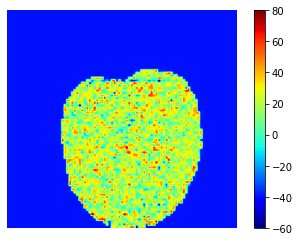

9


In [91]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing

###########4.回归##########
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from kernelpls import KernelPLS
import scipy.io


my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12)
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/5_纹理特征/2_norlize.xlsx'

x_path2 = 'C:/Users/longteng/Desktop/tu/else/新建 Microsoft Excel 工作表.xlsx'

#打开文件
readbook_2 = xlrd.open_workbook(x_path2)

#读取文件
sheet_2 = readbook_2.sheet_by_index(0)
x2 = [sheet_2.cell_value(i2, j2) for i2 in range(0, sheet_2.nrows) for j2 in range(0, sheet_2.ncols)]

#转为矩阵并reshape
x3 = np.array(x2)  
X3 = x3.reshape(sheet_2.nrows,sheet_2.ncols)

#读取光谱数据以及spad值，左开右闭
X90 = X3[0:62,0:2]  #光谱 78

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X10 = X2[:,0:78]  #光谱 78

X1 = X10[:,0:52] #光谱 78

Y = X2[:,-1]


h = 45 #主改这个

r1 = np.zeros(h -2+1)
r2 = np.zeros(h -2+1)
r3 = np.zeros(h -2+1)

m1 = np.zeros(h -2+1)
m2 = np.zeros(h -2+1)
m3 = np.zeros(h -2+1)

s = np.zeros(h -2+1)

###########3.具体方法选择##########
###3.1回归####
j = 45

###3.5 PLSRegression回归####
model_PLS = PLSRegression(n_components=j)

model = model_PLS


# 使用 train_test_split 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 1/5, random_state = 0)


# 使用 cross_validate 进行训练和评估
scoring = ['r2', 'neg_mean_squared_error']
scores2 = cross_validate(model, X_train, y_train,scoring = scoring,cv = 5,return_train_score=True, return_estimator=True)


# 提取各项评估指标的结果
train_score = scores2['train_r2'].mean()
train_mse = scores2['train_neg_mean_squared_error'].mean()

val_score = scores2['test_r2'].mean()
val_mse = scores2['test_neg_mean_squared_error'].mean()

# 获取交叉验证模型中的最佳模型
best_model_idx = np.argmax(scores2['test_r2'])
best_model = scores2['estimator'][best_model_idx]
predicted = best_model.predict(X_test)


rt2 = [9,18,23,29,34,36,46,55,60]
rt2 = np.array(rt2)
for rt in range(0,9):
    wer = rt2[rt]
    path = os.path.join('C:/Users/longteng/Desktop/tu/else/',str(wer),'.mat')
    nowPath1 = path.replace('\\','')

    A = scipy.io.loadmat(nowPath1)
    data = A[ 'A6' ]
    arr1 = np.array(data)

    predicted3 = best_model.predict(arr1)

    a = X90[wer-1,0]
    b = X90[wer-1,1]
    arr = predicted3.reshape(a.astype(int),b.astype(int))

    for i in range(0,a.astype(int)):
        for j in range(0,b.astype(int)):
            if arr[i,j] == arr[a.astype(int)-1,b.astype(int)-1]:
                arr[i,j] = -40

    plt.imshow(arr, cmap='jet', vmin=-60, vmax=80)
    plt.colorbar()
    plt.axis('off')
    plt.show()

    print(rt+1)

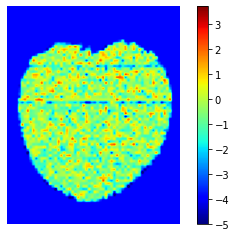

1


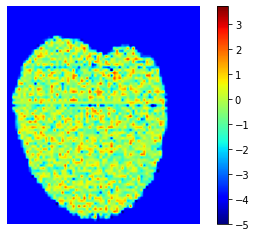

2


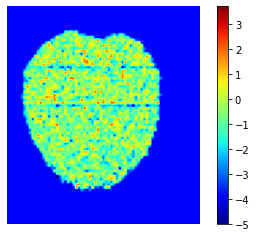

3


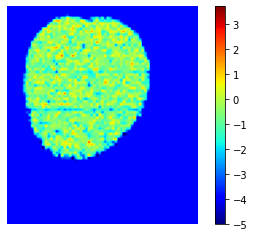

4


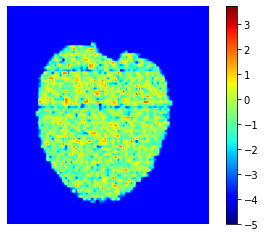

5


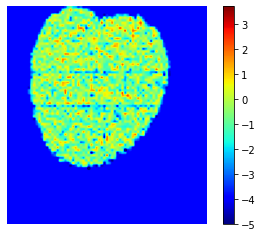

6


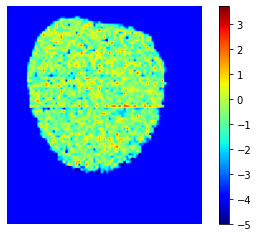

7


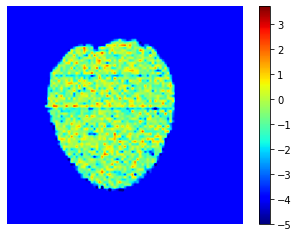

8


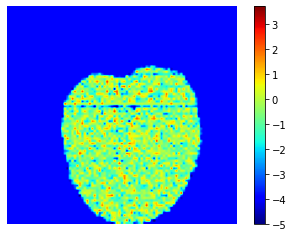

9


In [131]:
# -*- coding: UTF-8 -*-
from PIL import Image
from skimage import data, exposure, img_as_float
import cv2
import os
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import imutils
import math
import random
from functools import partial
import sys,os

import xlsxwriter as xlwt 
import xlrd  

from My_Preprocess import preprocess
from numpy import *;#导入numpy的库函数
import numpy as np; #这个方式使用numpy的函数时，需要以np.开头。
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing

###########4.回归##########
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from kernelpls import KernelPLS
import scipy.io


my_font = font_manager.FontProperties(fname=r"C:/Windows/Fonts/simsun.ttc", size=12)
###########1.数据导入##########
#路径
x_path = 'F:/Litchi/Indoor/Xian_jin_feng/5_纹理特征/5_norlize.xlsx'

x_path2 = 'C:/Users/longteng/Desktop/tu/else/新建 Microsoft Excel 工作表.xlsx'

#打开文件
readbook_2 = xlrd.open_workbook(x_path2)

#读取文件
sheet_2 = readbook_2.sheet_by_index(0)
x2 = [sheet_2.cell_value(i2, j2) for i2 in range(0, sheet_2.nrows) for j2 in range(0, sheet_2.ncols)]

#转为矩阵并reshape
x3 = np.array(x2)  
X3 = x3.reshape(sheet_2.nrows,sheet_2.ncols)

#读取光谱数据以及spad值，左开右闭
X90 = X3[0:62,0:2]  #光谱 78

#打开文件
readbook_1 = xlrd.open_workbook(x_path)

#读取文件
sheet_1 = readbook_1.sheet_by_index(0)
x = [sheet_1.cell_value(i, j) for i in range(0, sheet_1.nrows) for j in range(0, sheet_1.ncols)]

#转为矩阵并reshape
x1 = np.array(x)  
X2 = x1.reshape(sheet_1.nrows,sheet_1.ncols)

#读取光谱数据以及spad值，左开右闭
X10 = X2[:,0:78]  #光谱 78

X1 = X10[:,0:28] #光谱 78

Y = X2[:,-1]


h = 25 #主改这个

r1 = np.zeros(h -2+1)
r2 = np.zeros(h -2+1)
r3 = np.zeros(h -2+1)

m1 = np.zeros(h -2+1)
m2 = np.zeros(h -2+1)
m3 = np.zeros(h -2+1)

s = np.zeros(h -2+1)

###########3.具体方法选择##########
###3.1回归####
j = 25

###3.5 PLSRegression回归####
model_PLS = PLSRegression(n_components=j)

model = model_PLS

# 使用 train_test_split 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 1/5, random_state = 0)

# 使用 cross_validate 进行训练和评估
scoring = ['r2', 'neg_mean_squared_error']
scores2 = cross_validate(model, X_train, y_train,scoring = scoring,cv = 5,return_train_score=True, return_estimator=True)


# 提取各项评估指标的结果
train_score = scores2['train_r2'].mean()
train_mse = scores2['train_neg_mean_squared_error'].mean()

val_score = scores2['test_r2'].mean()
val_mse = scores2['test_neg_mean_squared_error'].mean()

# 获取交叉验证模型中的最佳模型
best_model_idx = np.argmax(scores2['test_r2'])
best_model = scores2['estimator'][best_model_idx]
predicted = best_model.predict(X_test)


rt2 = [9,18,23,29,34,36,46,55,60]
rt2 = np.array(rt2)
for rt in range(0,9):
    wer = rt2[rt]
    path = os.path.join('C:/Users/longteng/Desktop/tu/else2/',str(wer),'.mat')
    nowPath1 = path.replace('\\','')

    A = scipy.io.loadmat(nowPath1)
    data = A[ 'A6' ]
    arr1 = np.array(data)

    predicted3 = best_model.predict(arr1)

    a = X90[wer-1,0]
    b = X90[wer-1,1]
    arr = predicted3.reshape(a.astype(int),b.astype(int))

    for i in range(0,a.astype(int)):
        for j in range(0,b.astype(int)):
            if arr[i,j] == arr[a.astype(int)-1,b.astype(int)-1]:
                arr[i,j] = -4
            if arr[i,j] > 2.4:
                arr[i,j] = 0

    plt.imshow(arr, cmap='jet', vmin=-5, vmax=3.7)
    plt.colorbar()
    plt.axis('off')
    plt.show()

    print(rt+1)